In [10]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [13]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("/Users/unamazin/Documents/CSCE435/CSCE_435_Project_2024/MPI_Builds/Cali_Files/*"))

(2/2) Creating Thicket: 100%|██████████| 209/209 [00:01<00:00, 105.88it/s]
/Users/unamazin/Documents/CSCE435/CSCE_435_Project_2024/.venv/lib/python3.9/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


View Calltree

In [14]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

3.946 main
├─ 0.153 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.010 comm
│  └─ 0.009 comm_large
│     ├─ 0.000 MPI_Gather
│     └─ 0.009 MPI_Scatter
├─ 3.347 comp
│  └─ 3.347 comp_large
│     └─ 2.589 comp
│        └─ 0.945 comp_small
├─ 0.001 correctness_check
└─ 0.012 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 3.95 indices: {'profile': np.int64(14334734)})
█ 3.55 - 3.95
█ 2.76 - 3.55
█ 1.97 - 2.76
█ 1.18 - 1.97
█ 0.39 - 1.18
█ 0.00 - 0.39

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [15]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  3014521619   
                                                          Random            3086809811   
                                                          ReverseSorted     1732433521   
                                                          Sorted            1810215220   
                                               262144     1_perc_perturbed  2991247076   

                                                                            nid  \
node                                 num_procs input_size input_type              
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  1.0   
                                                          Random            1.0   
                                                          ReverseSorted     1.0   
                                                          Sorted            1.0   
                                               262144     1_perc_perturbed  1.0   

                                                                             spot.channel  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  regionprofile   
                                                          Random            regionprofile   
                                                          ReverseSorted     regionprofile   
                                                          Sorted            regionprofile   
                                               262144     1_perc_perturbed  regionprofile   

                                                                            Min time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       1.117285   
                                                          Random                 1.121847   
                                                          ReverseSorted          1.240674   
                                                          Sorted                 1.123159   
                                               262144     1_perc_perturbed       3.550408   

                                                                            Max time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       1.118063   
                                                          Random                 1.123577   
                                                          ReverseSorted          1.240709   
                                                          Sorted                 1.123166   
                                               262144     1_perc_perturbed       3.550427   

                                                                            Avg time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       1.117674   
                                                          Random                 1.122712   
                                                          ReverseSorted          1.240692   
                                                          Sorted                 1.123162   
                                               262144     1_perc_perturbed       3.550418   

                                                                            Total time  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed    

In [16]:
# Define common variables
processes = sorted(tk.metadata["num_procs"].unique())
input_sizes = sorted(tk.metadata["input_size"].unique())
input_types = sorted(tk.metadata["input_type"].unique())

In [17]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

/Users/unamazin/Documents/CSCE435/CSCE_435_Project_2024/.venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


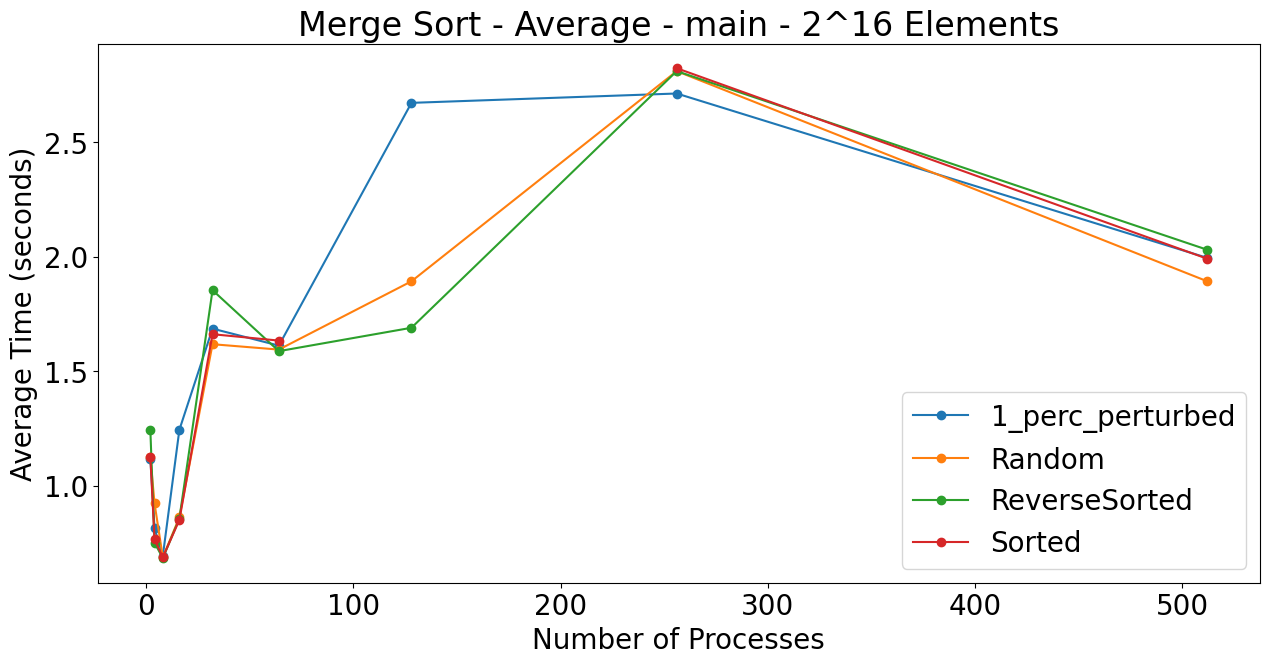

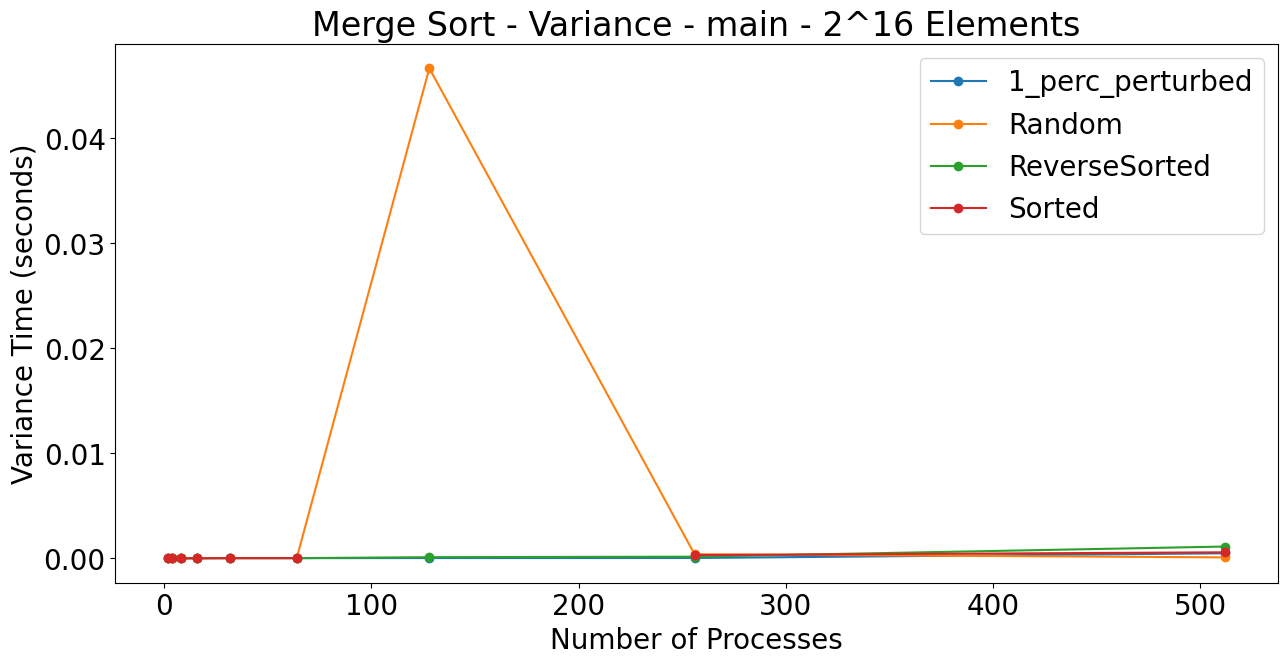

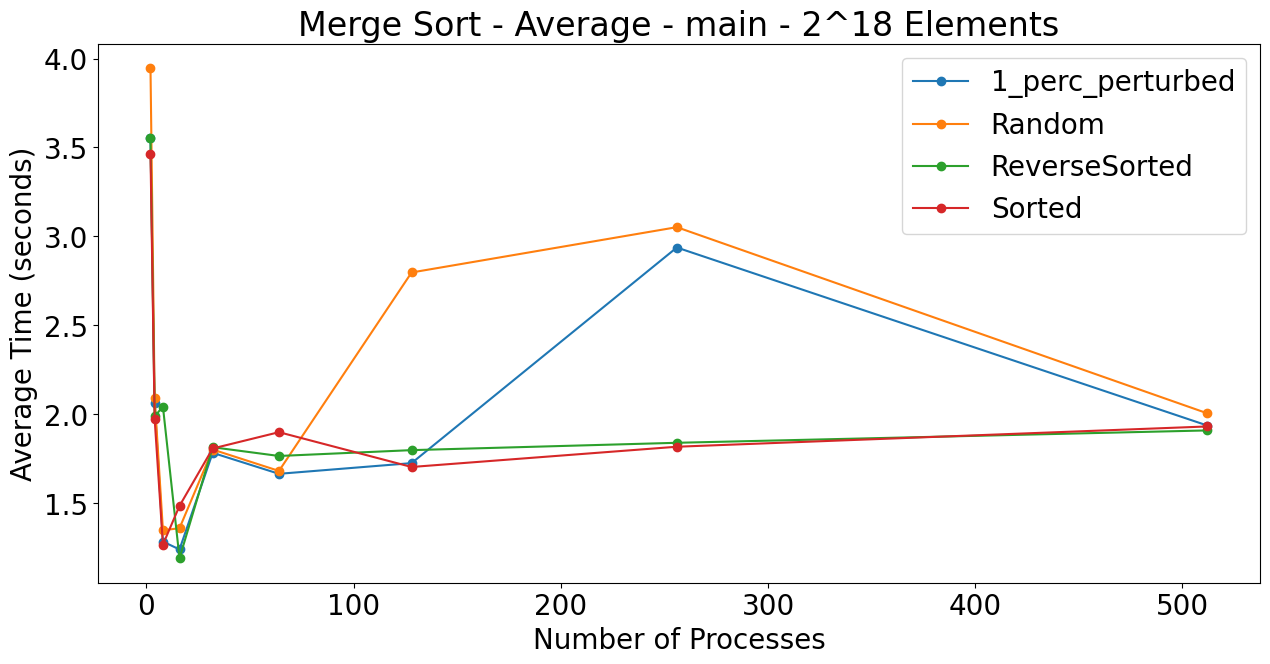

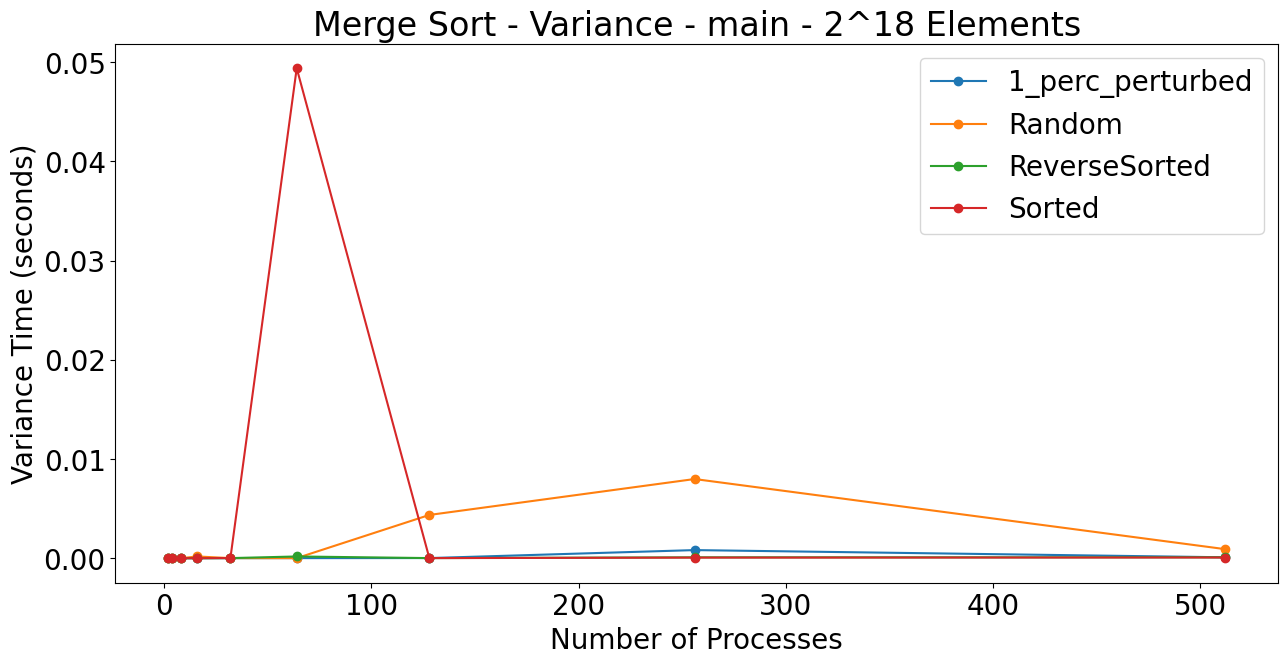

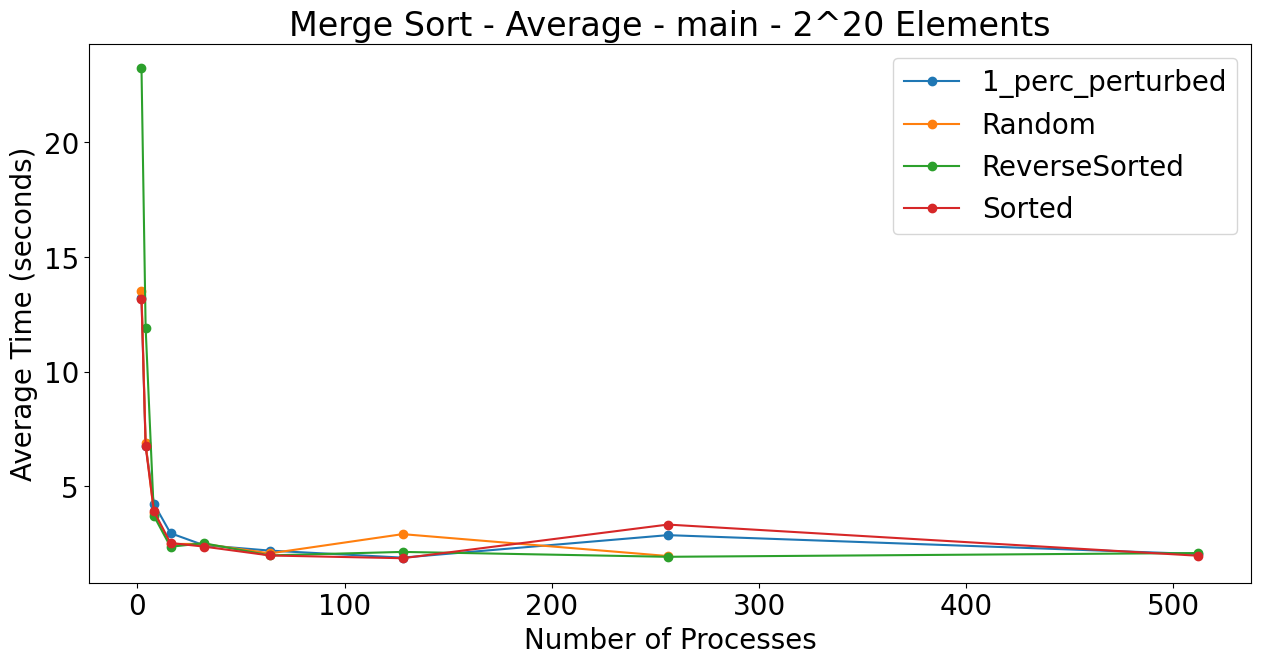

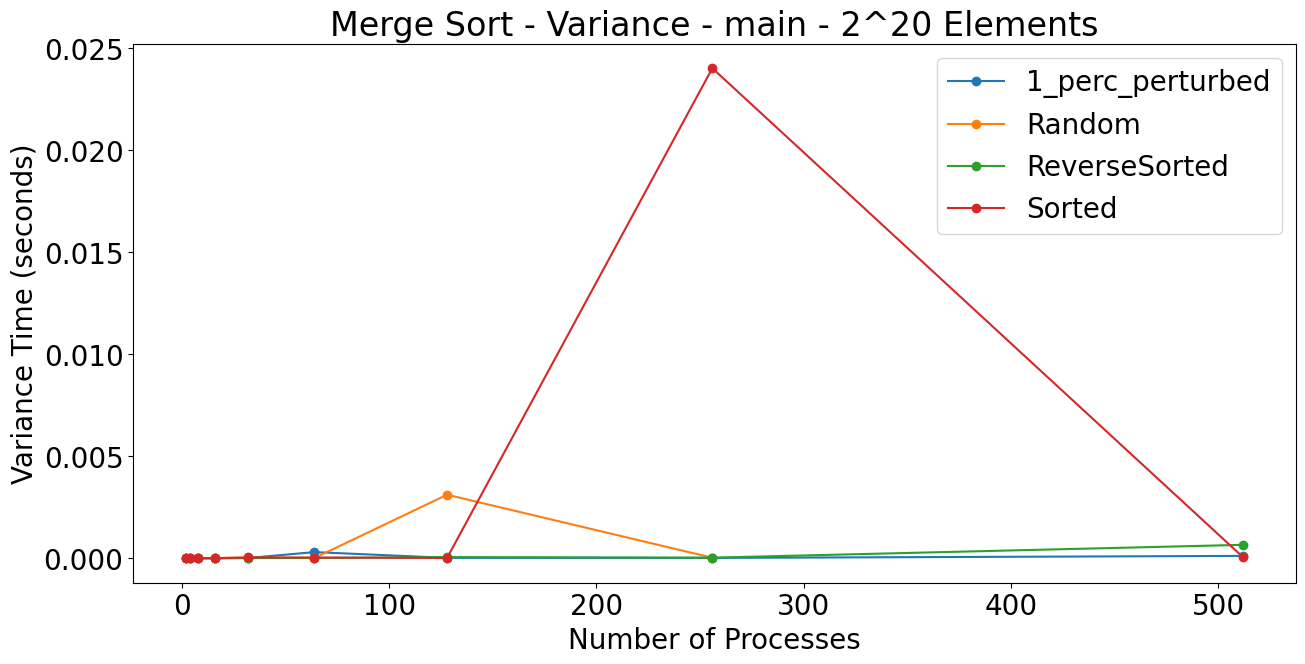

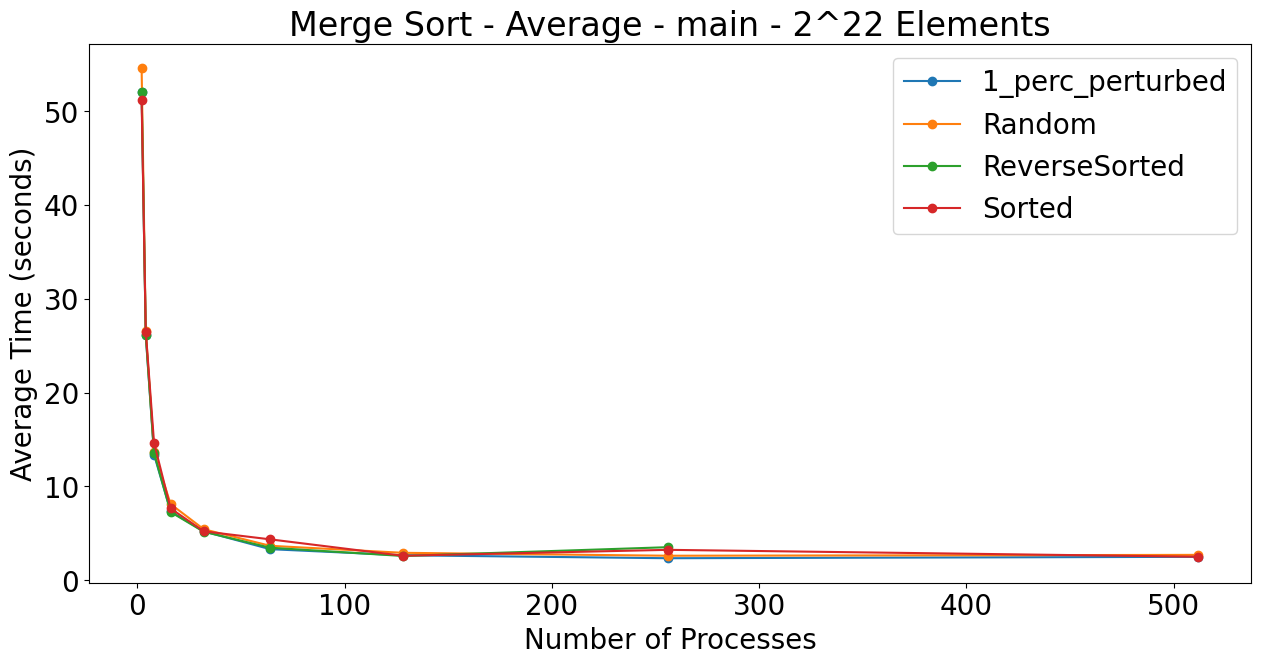

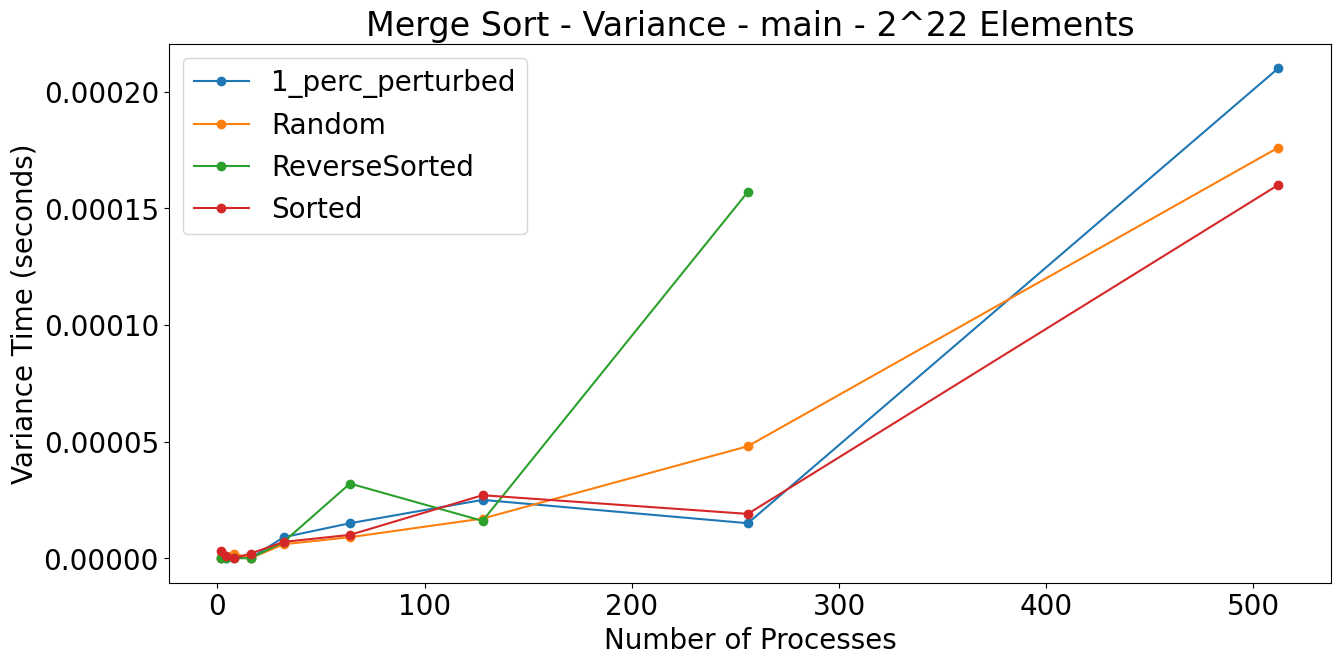

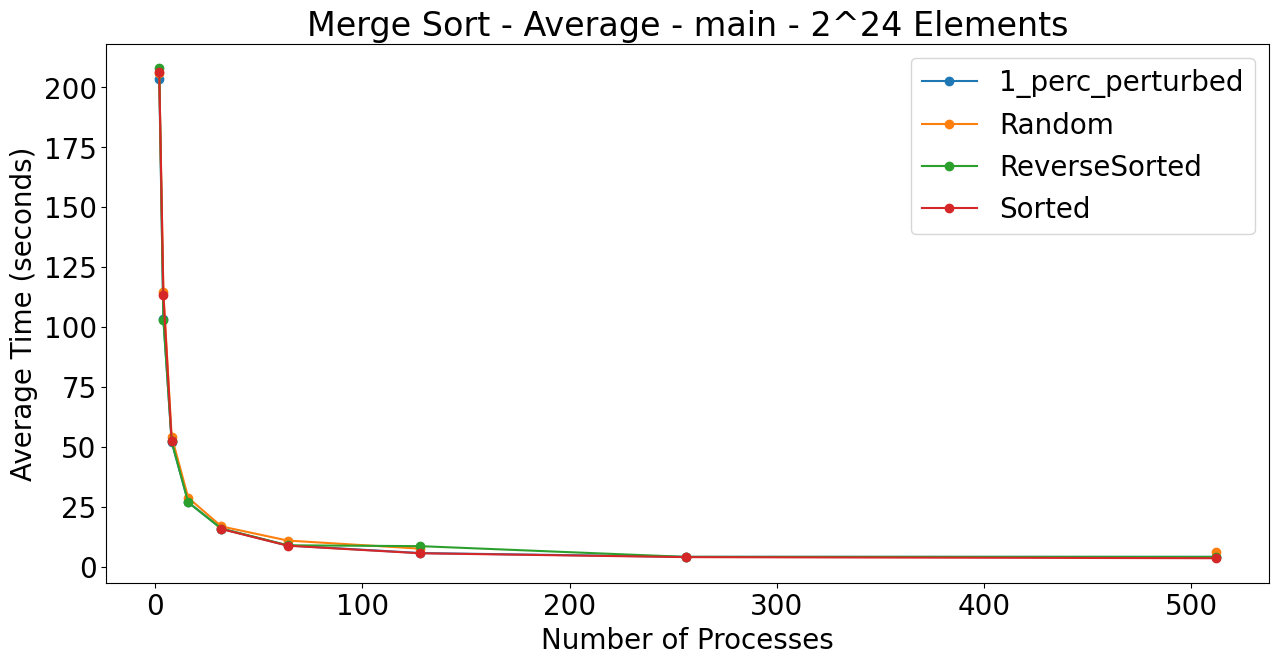

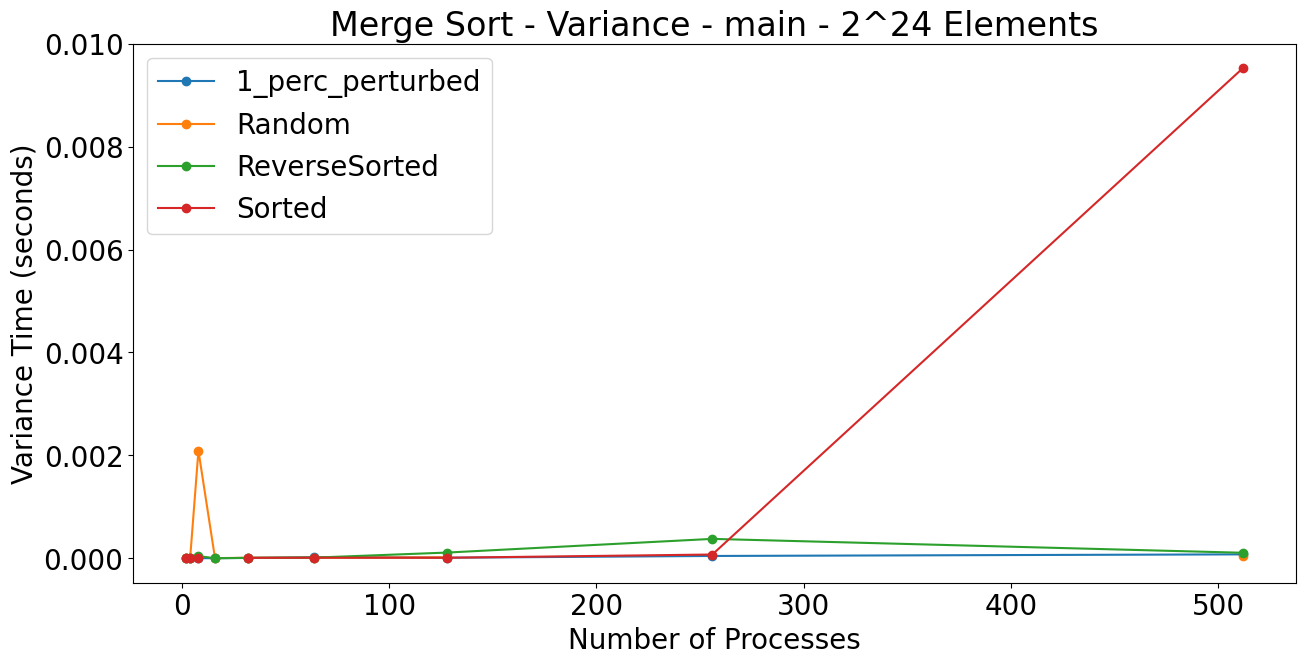

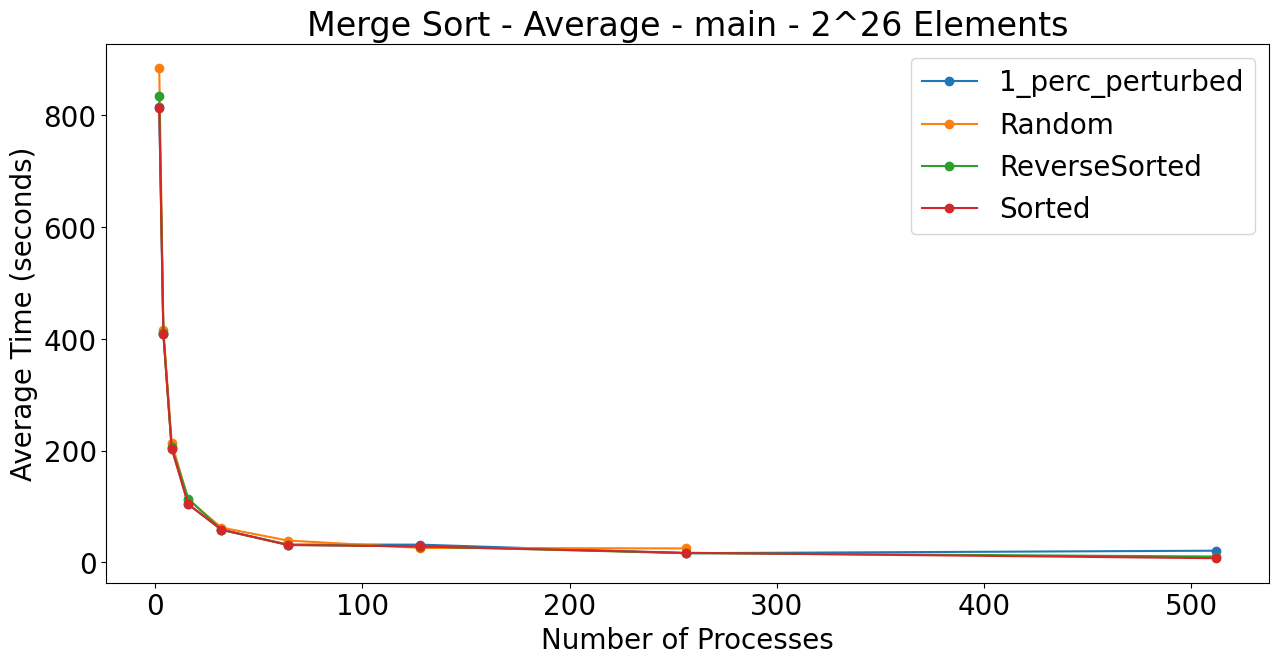

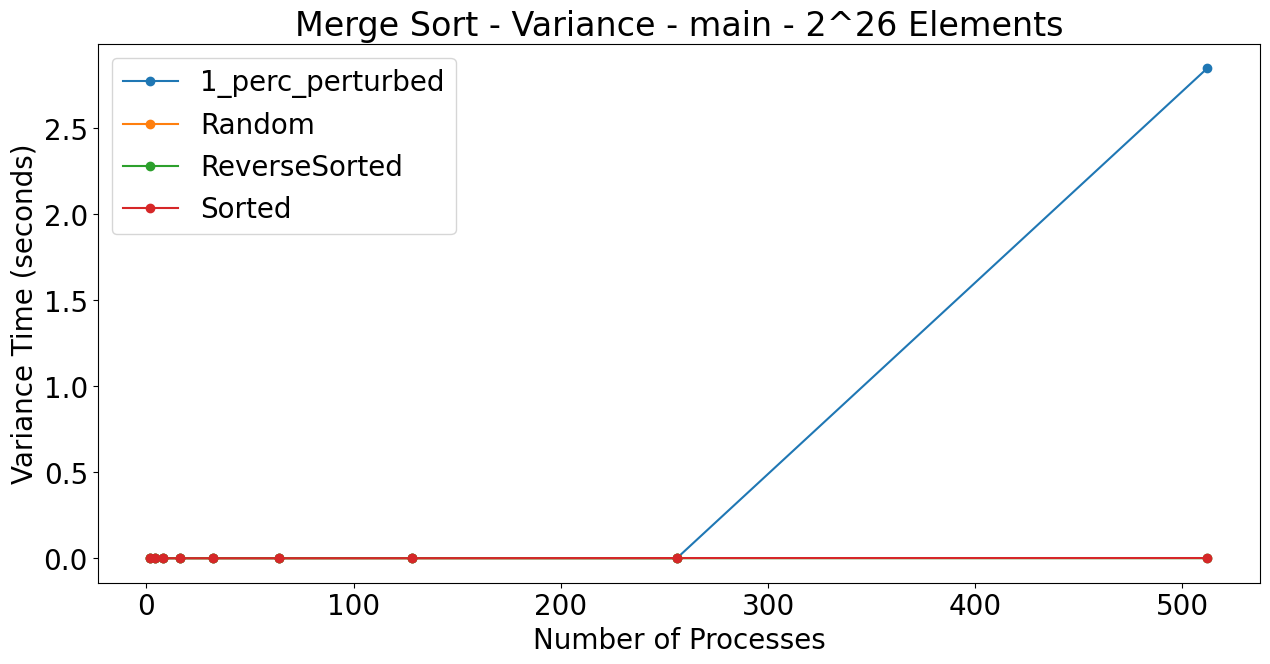

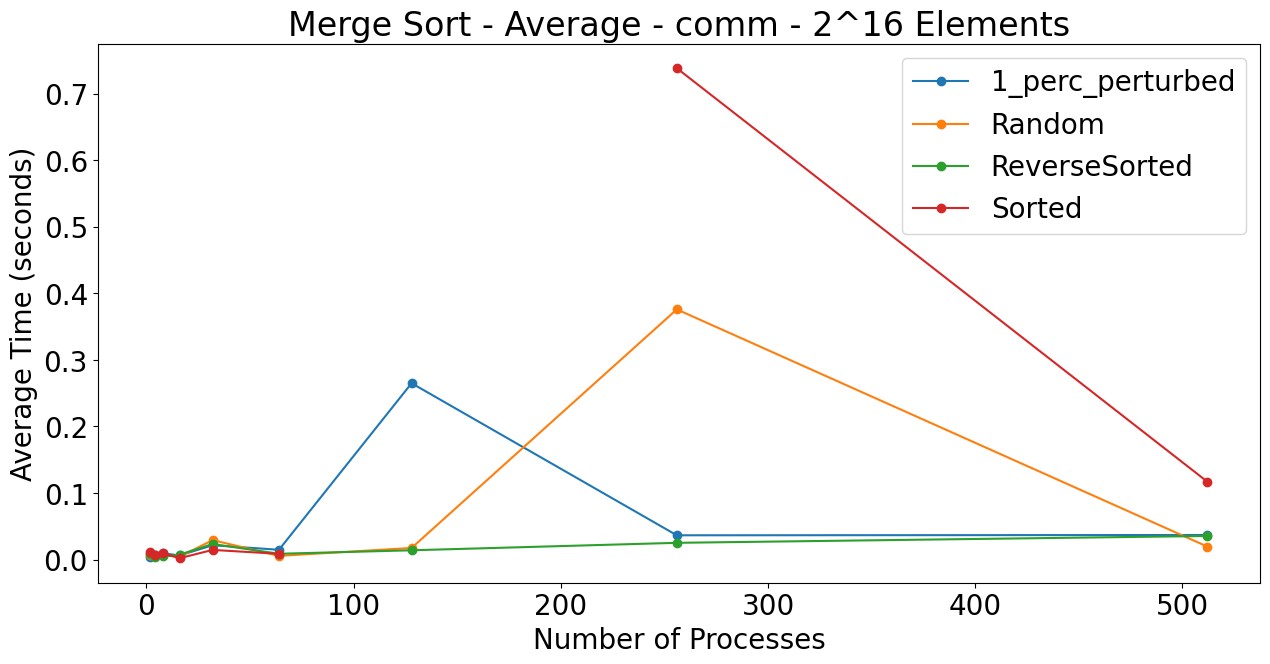

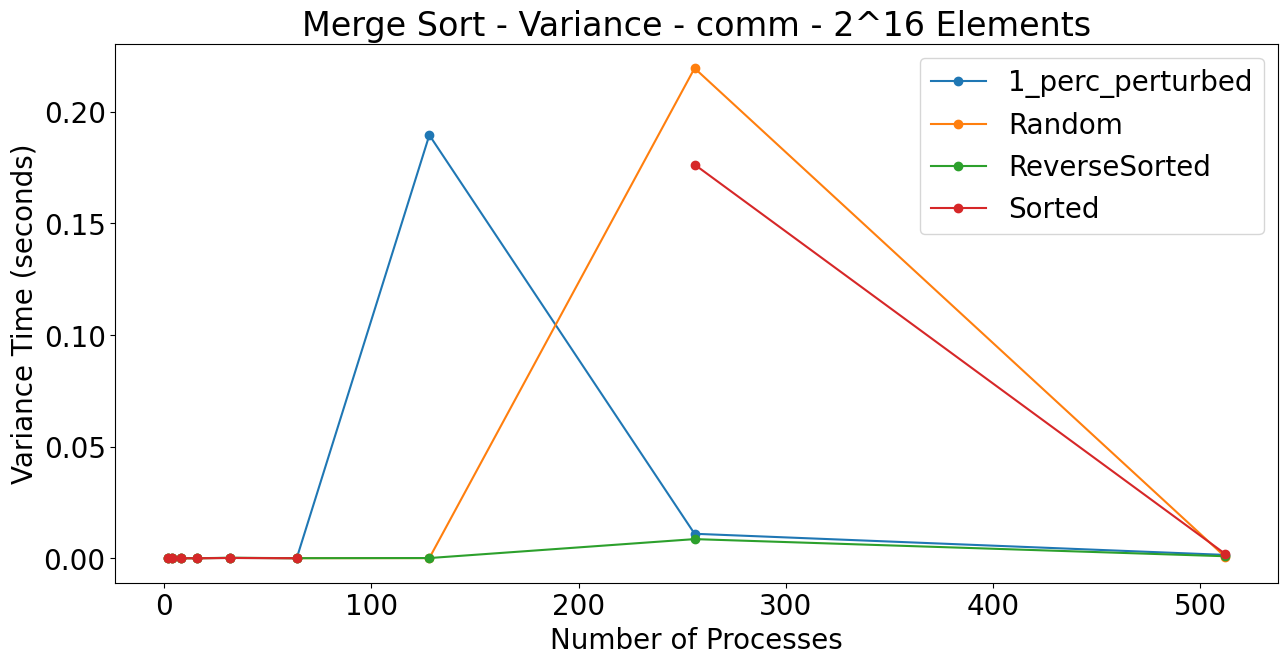

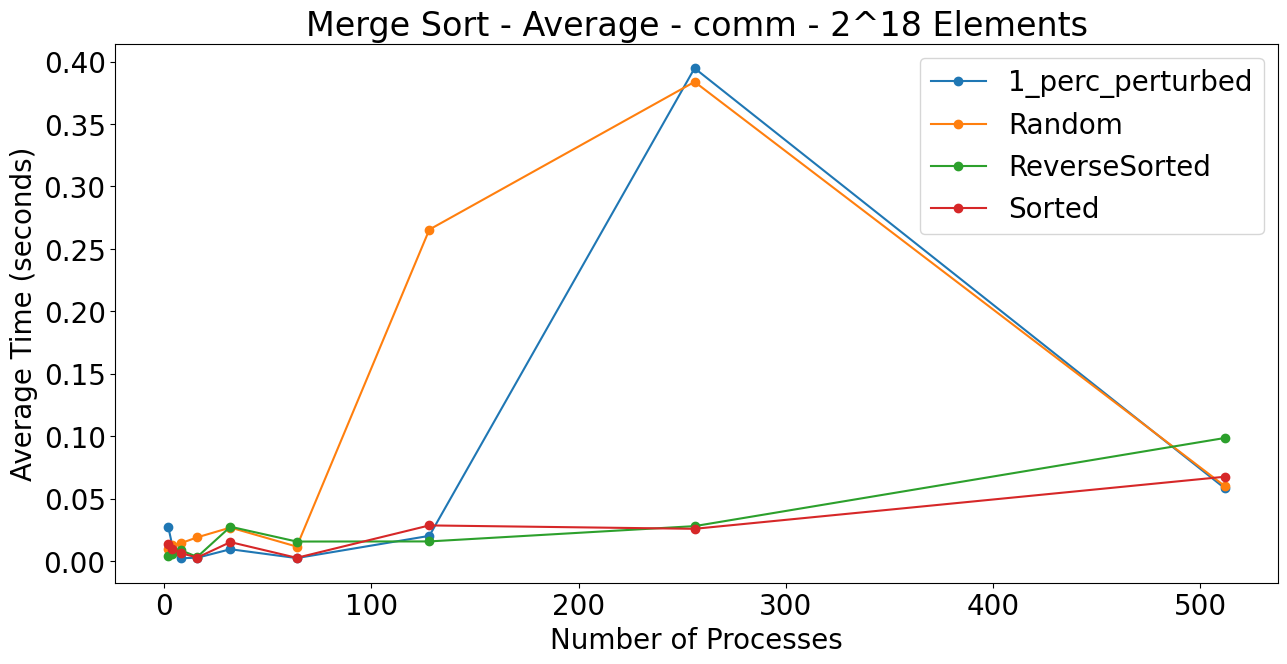

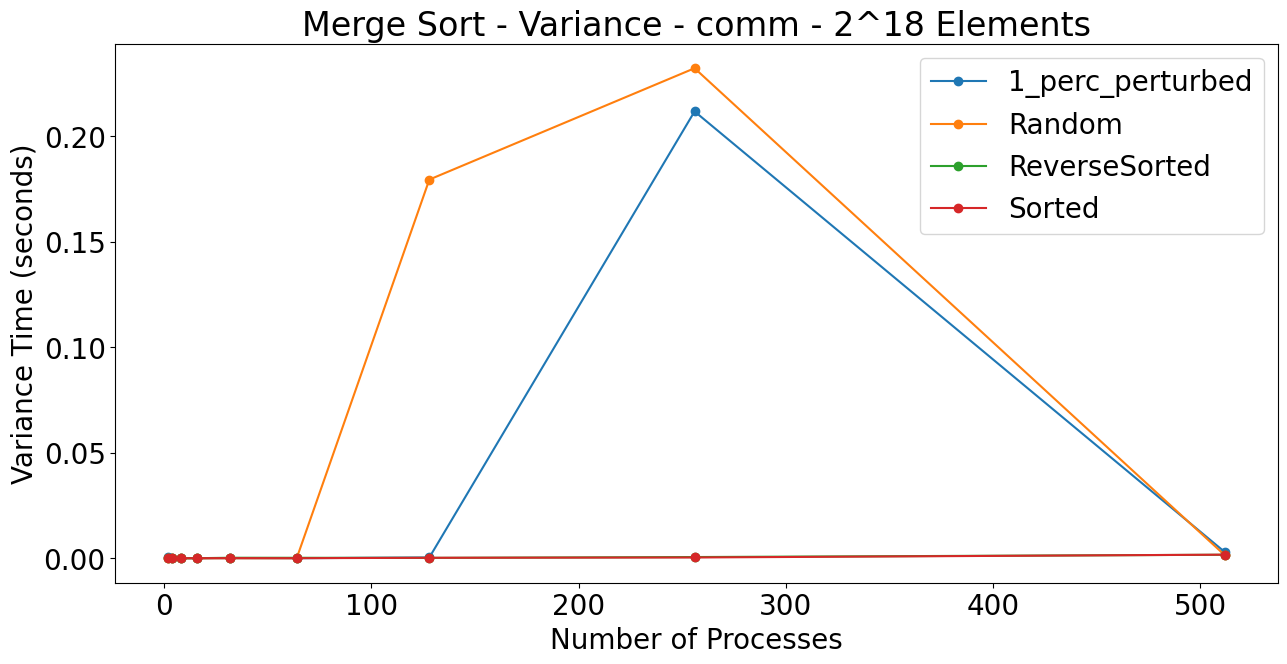

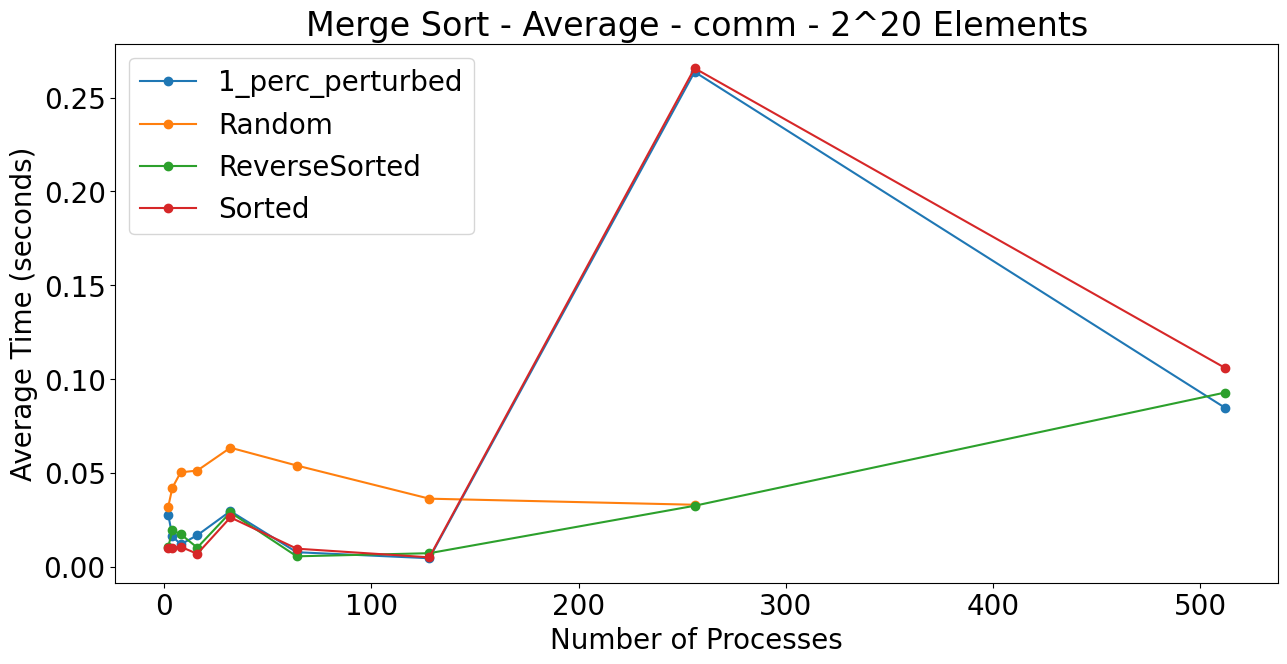

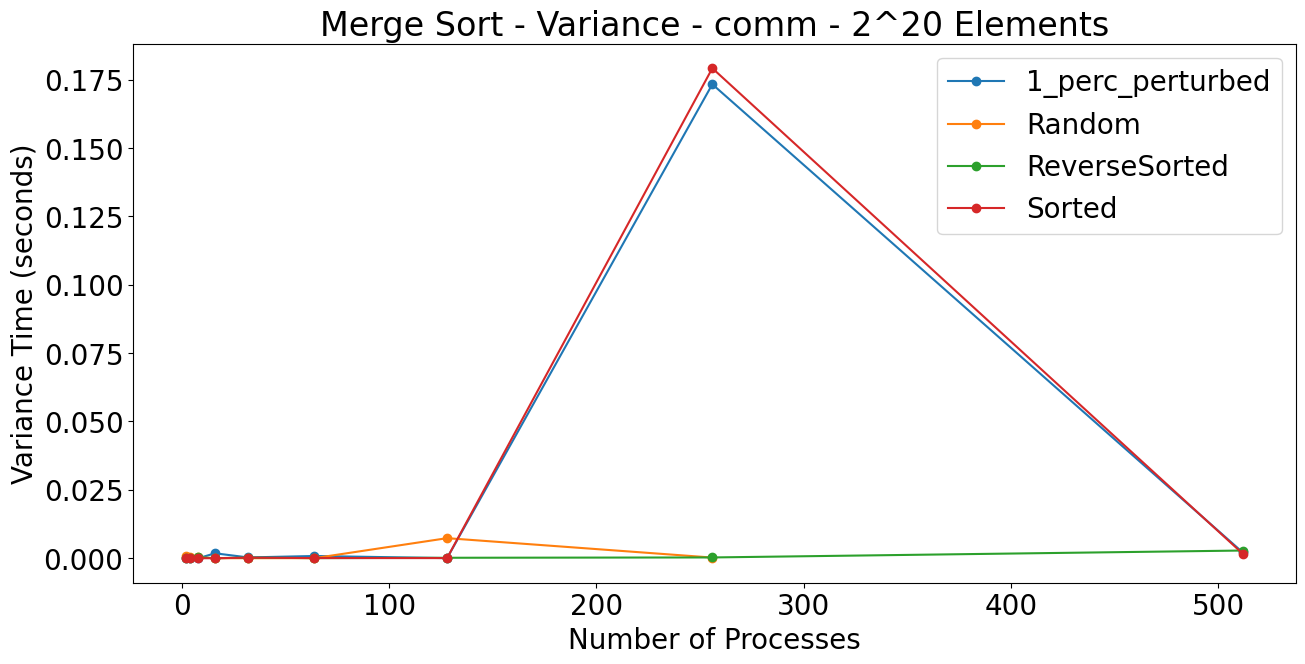

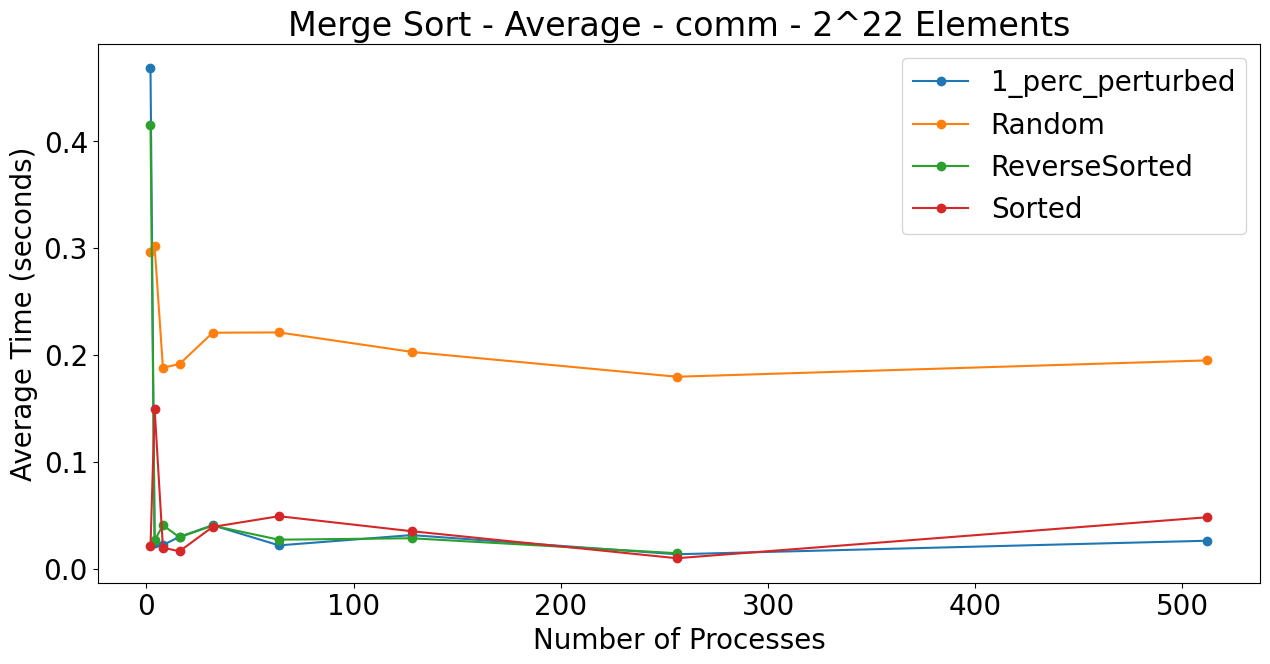

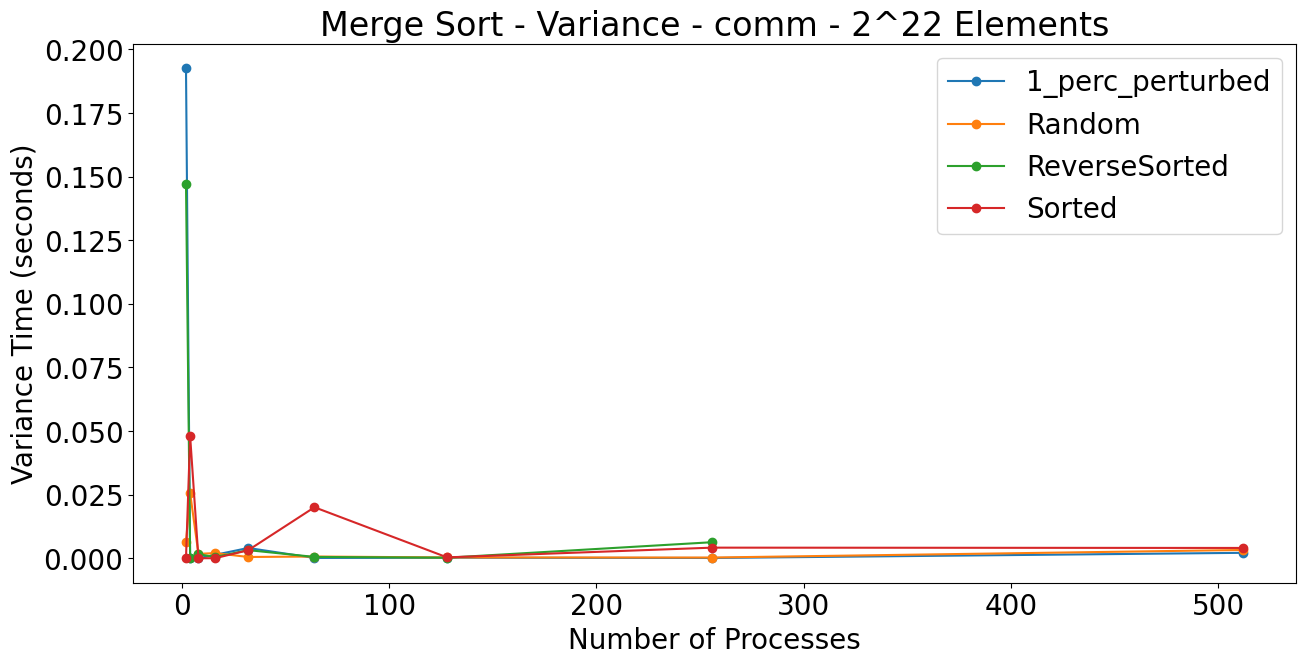

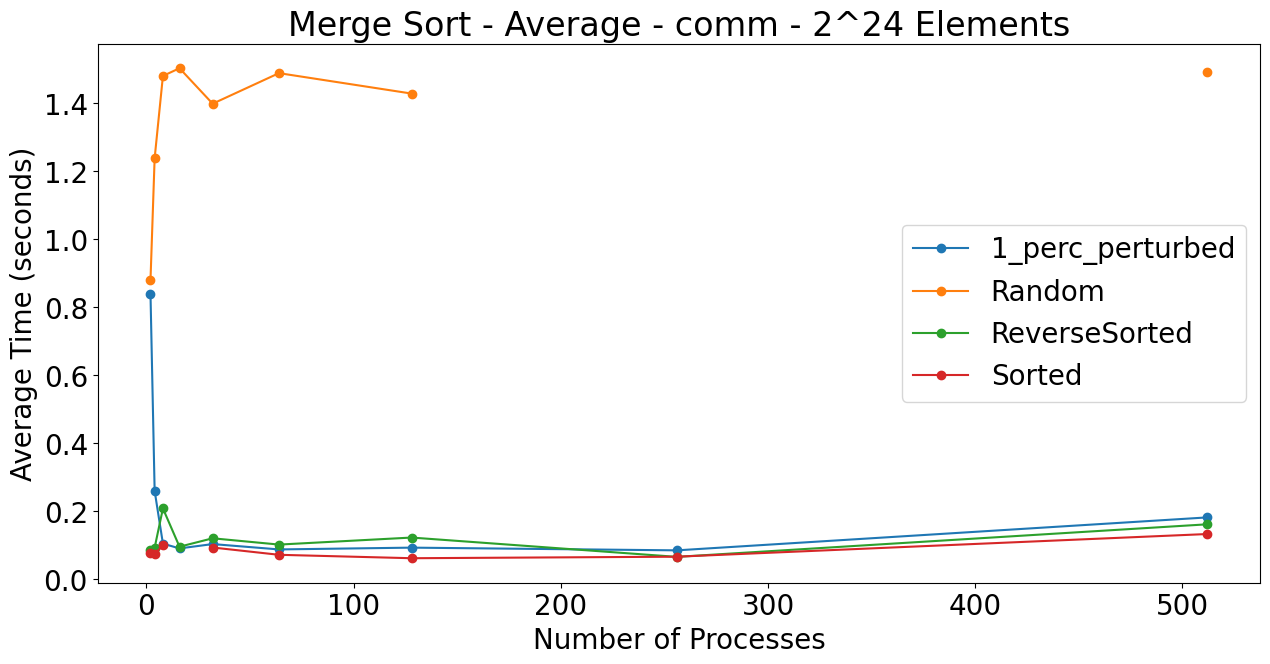

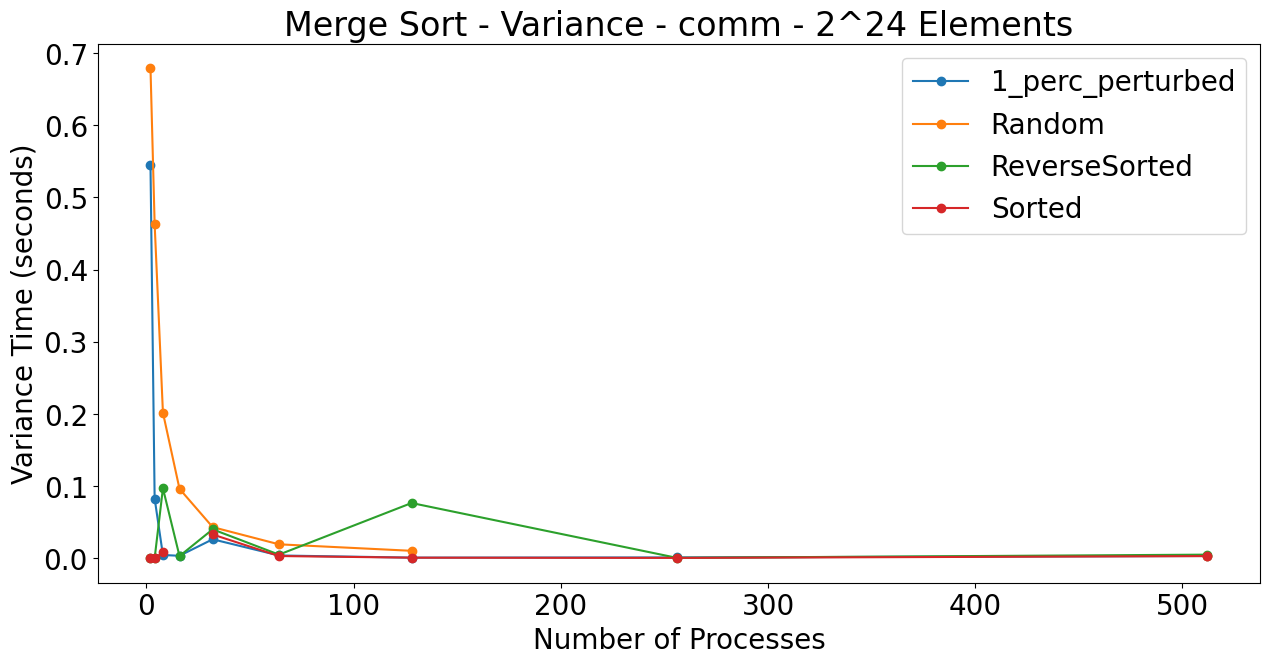

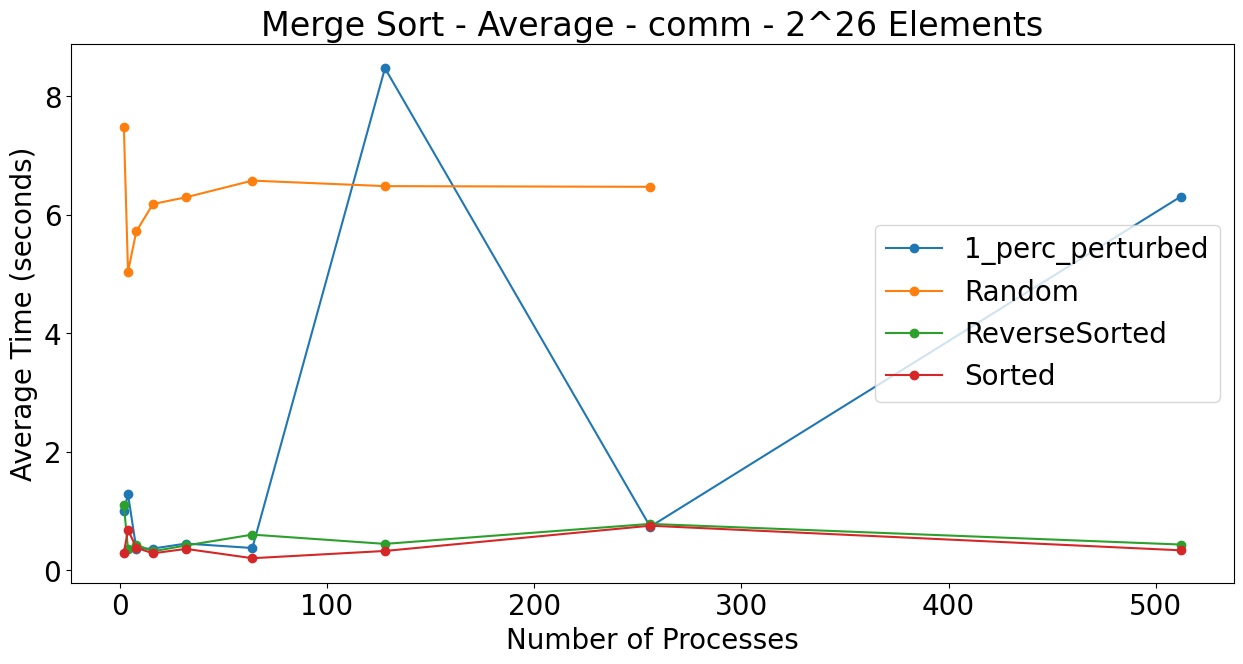

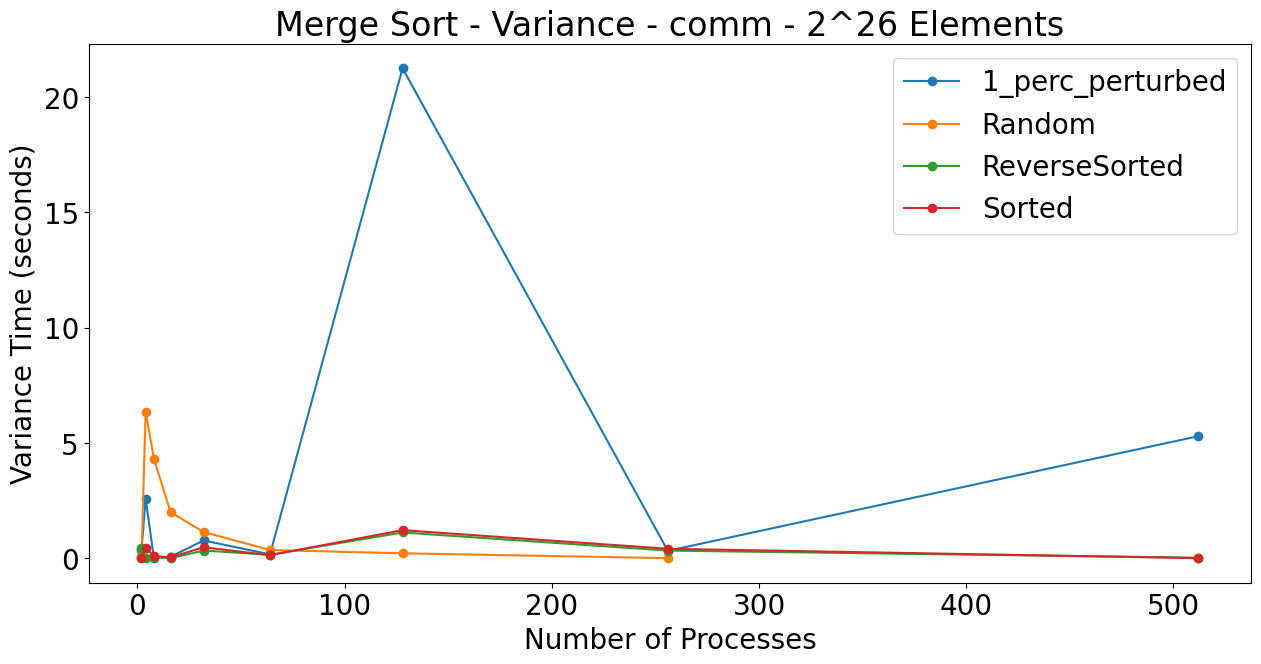

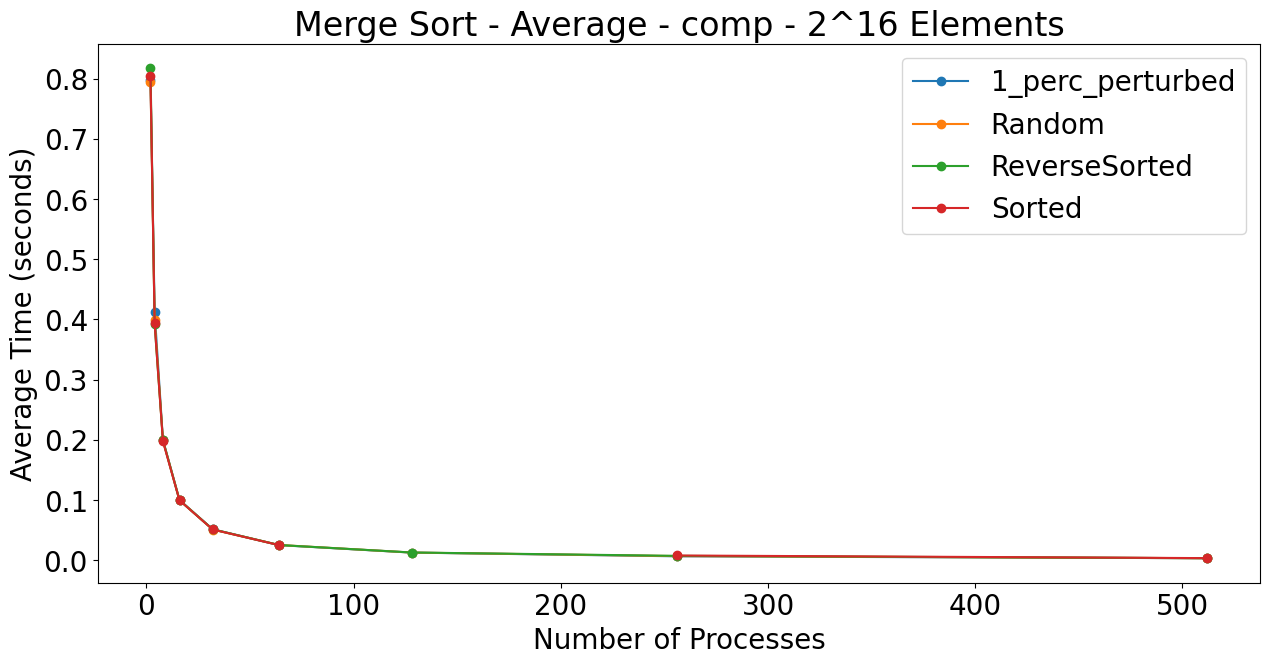

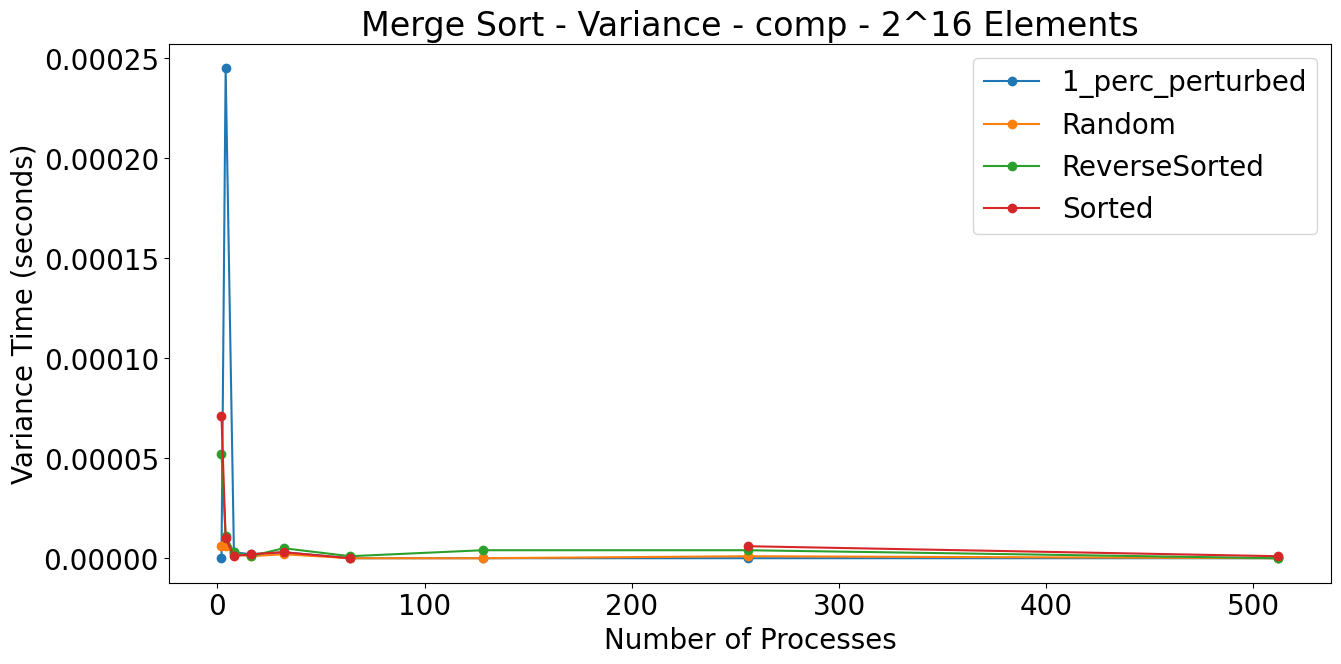

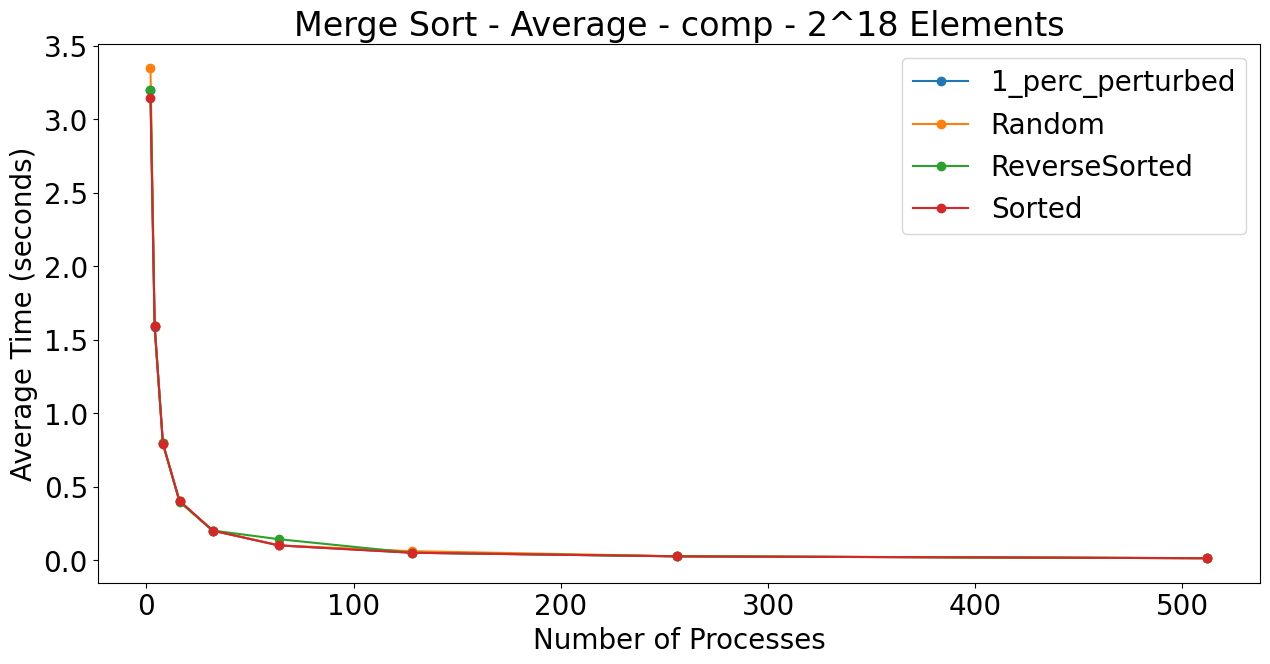

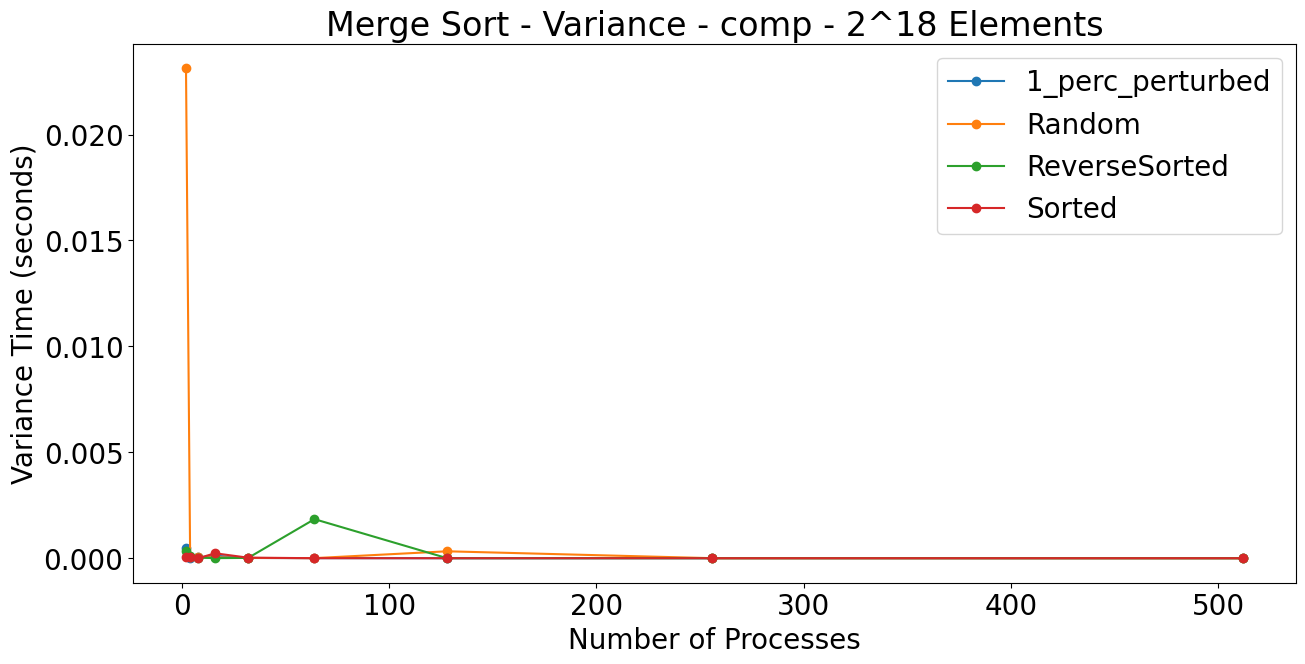

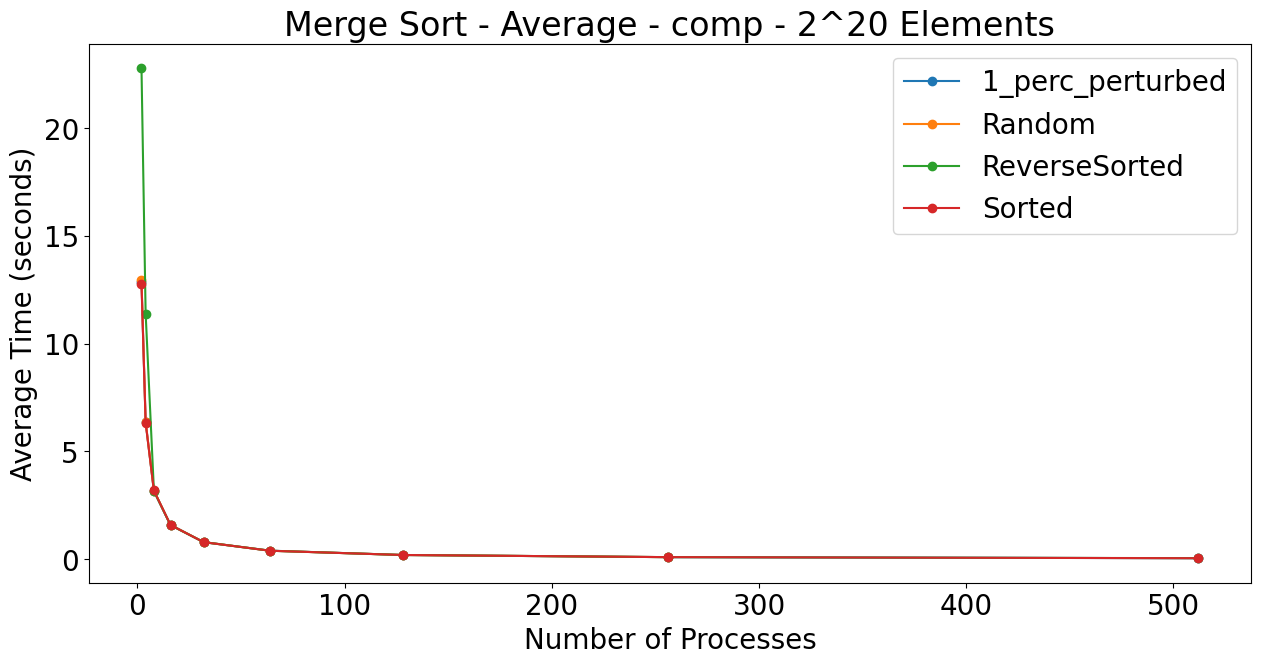

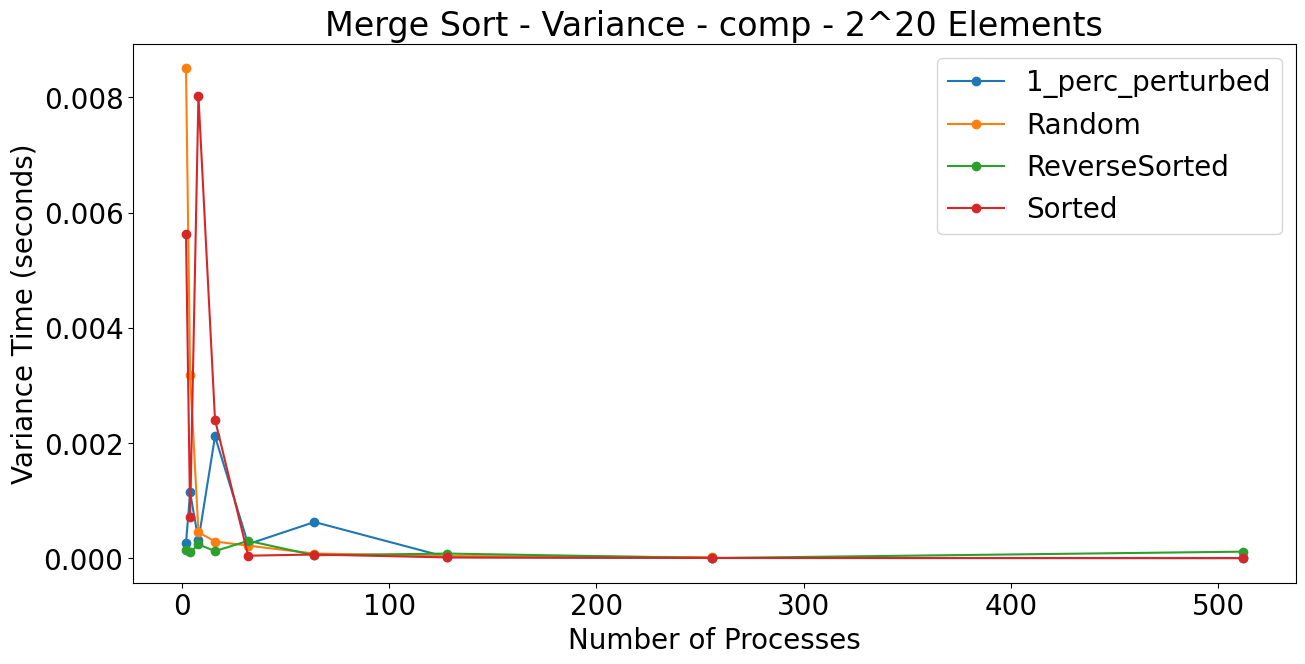

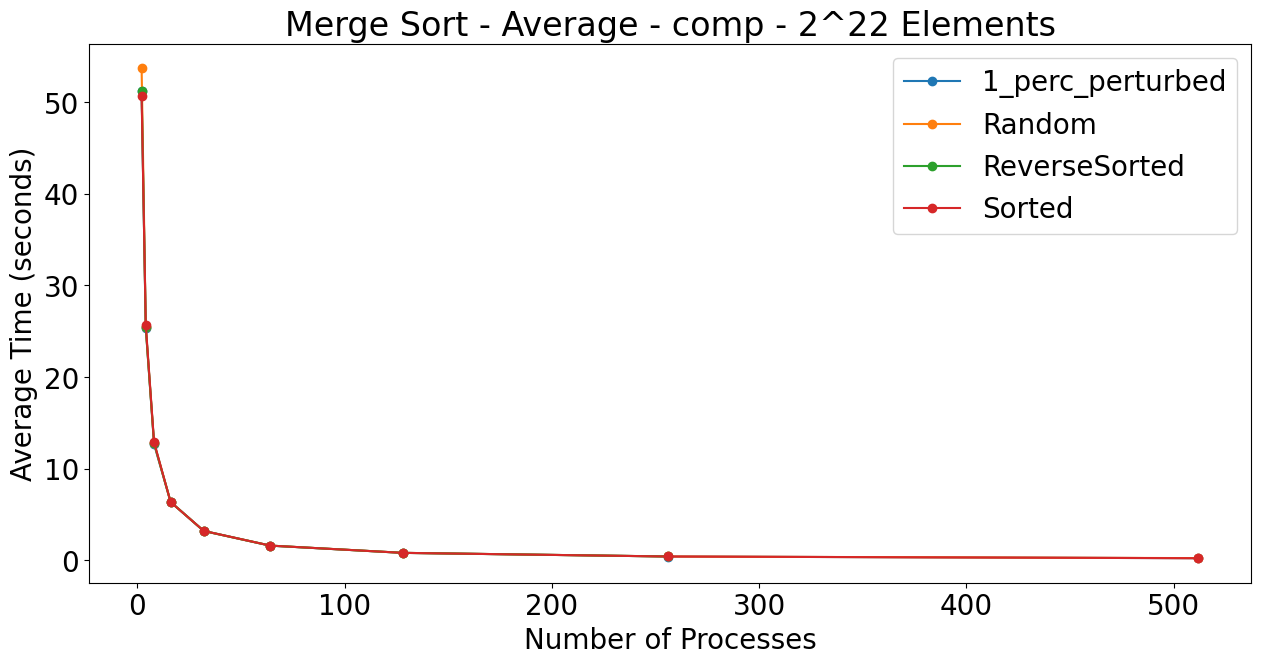

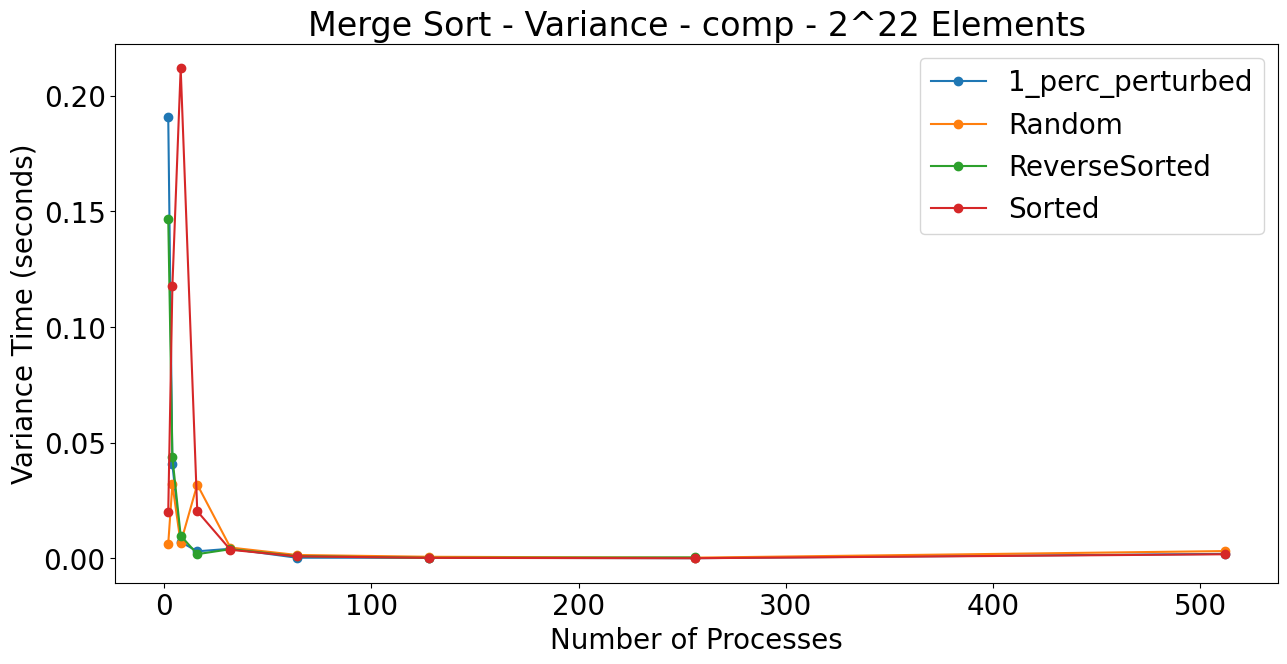

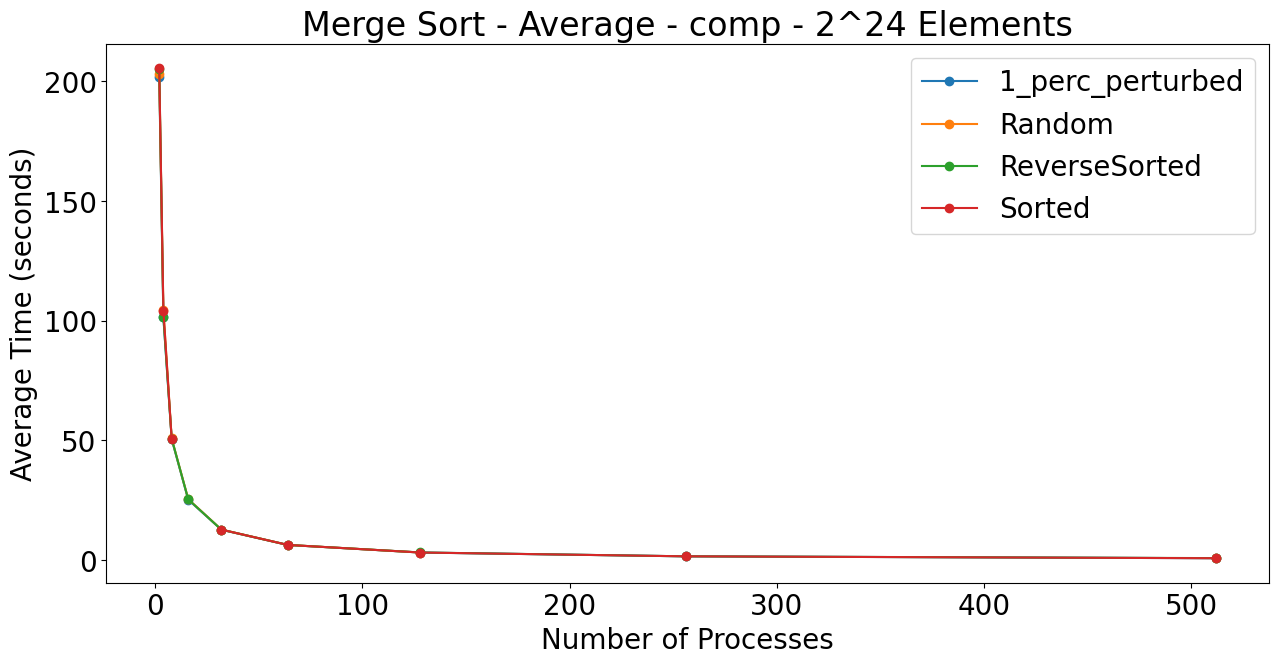

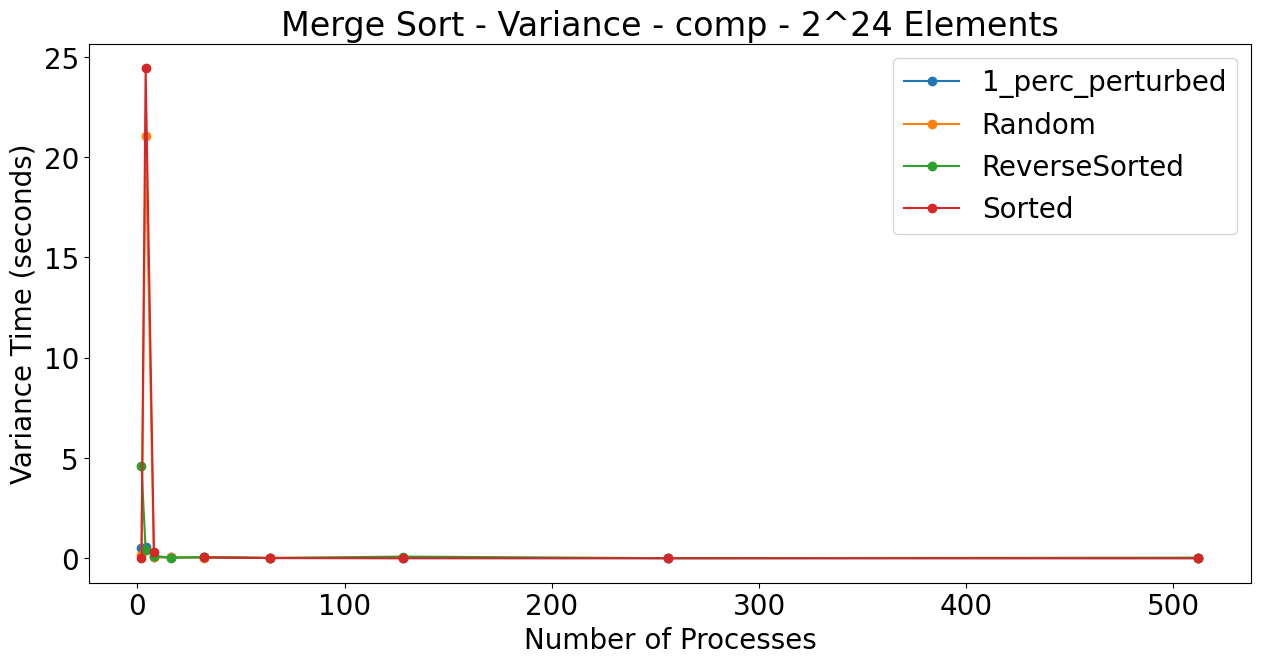

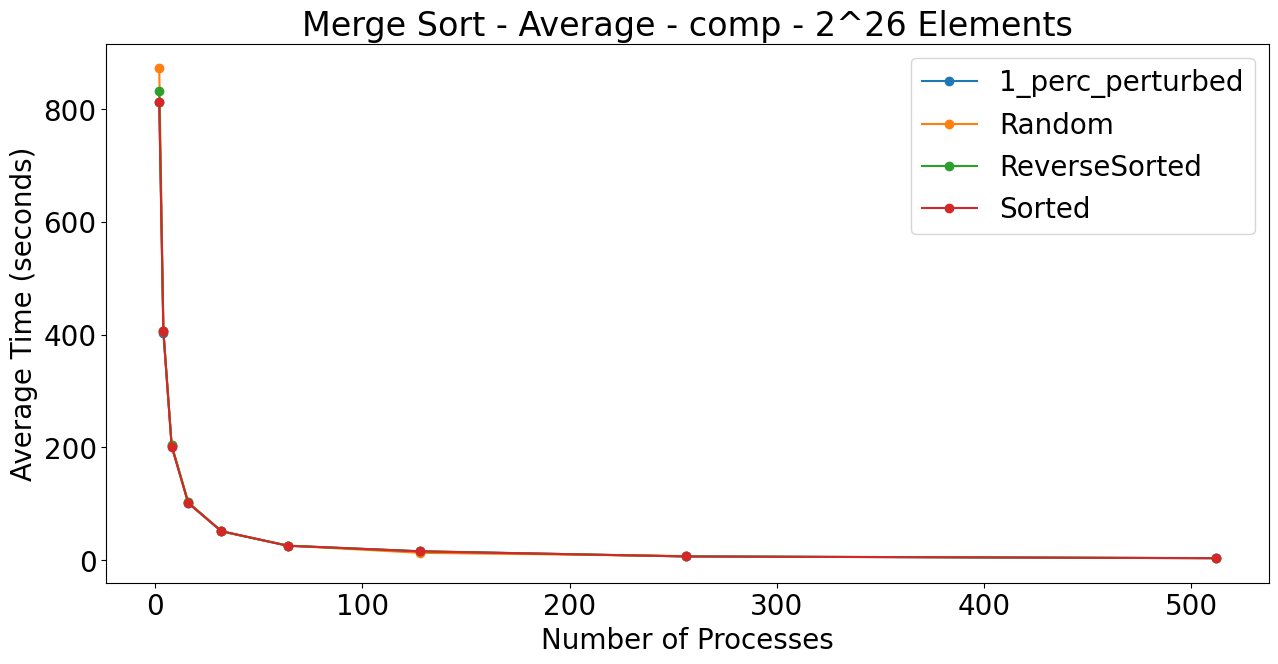

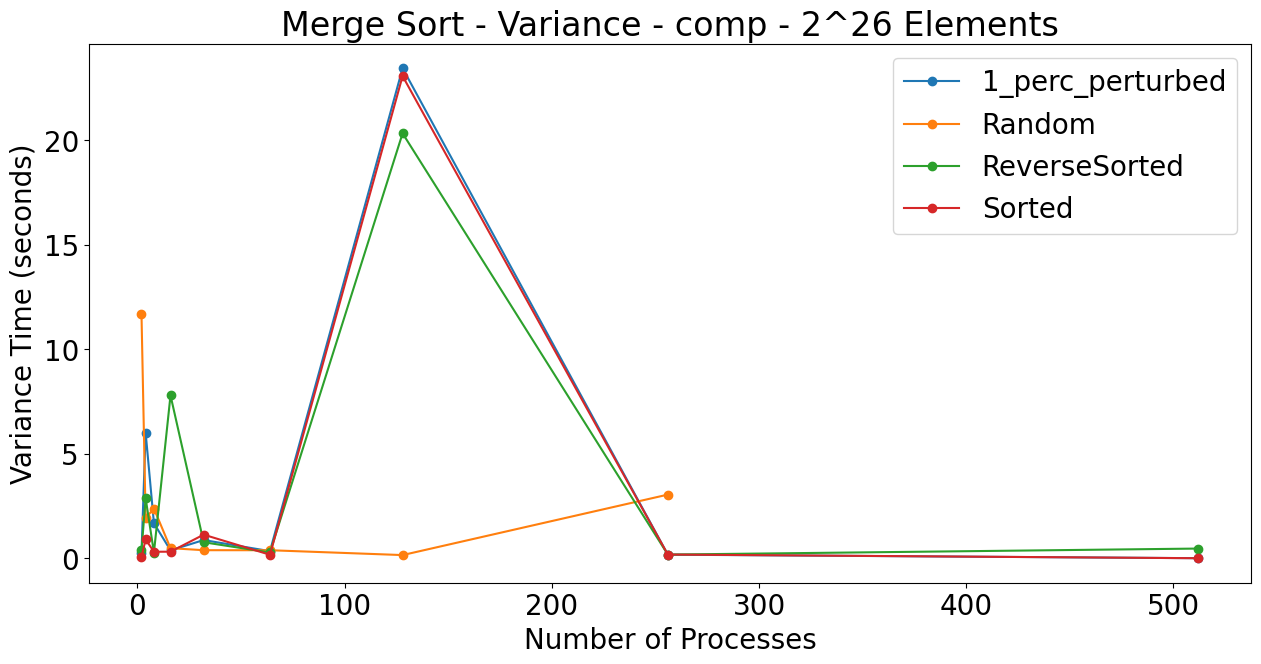

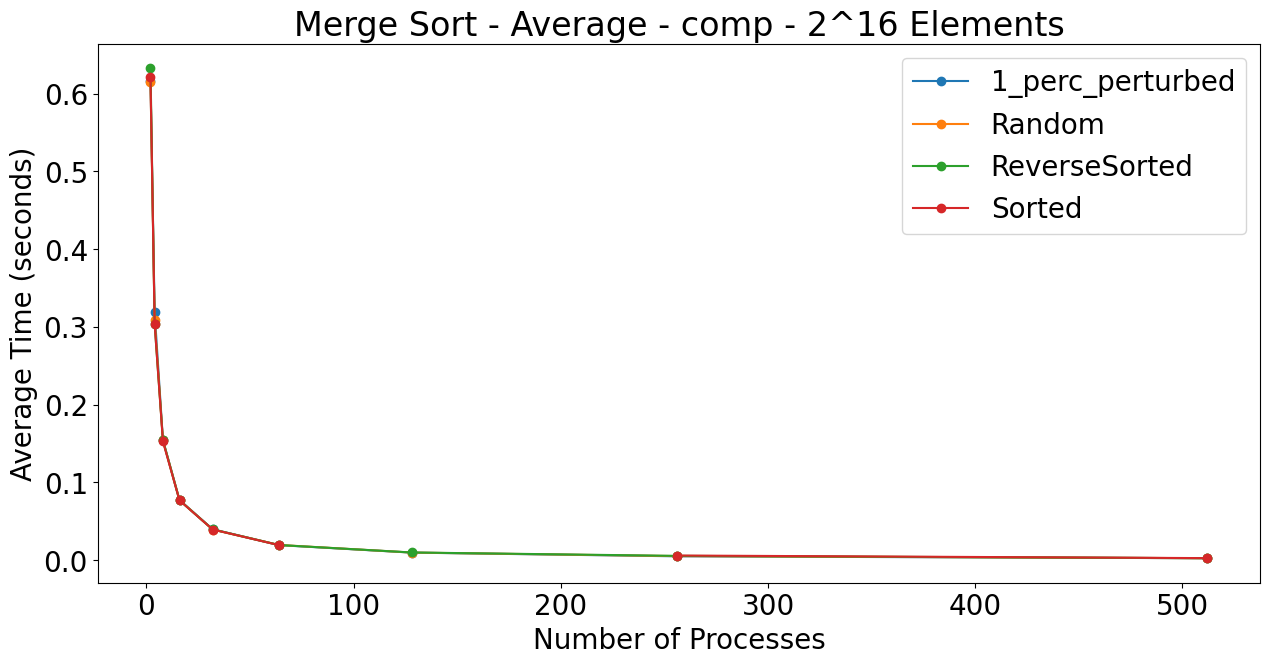

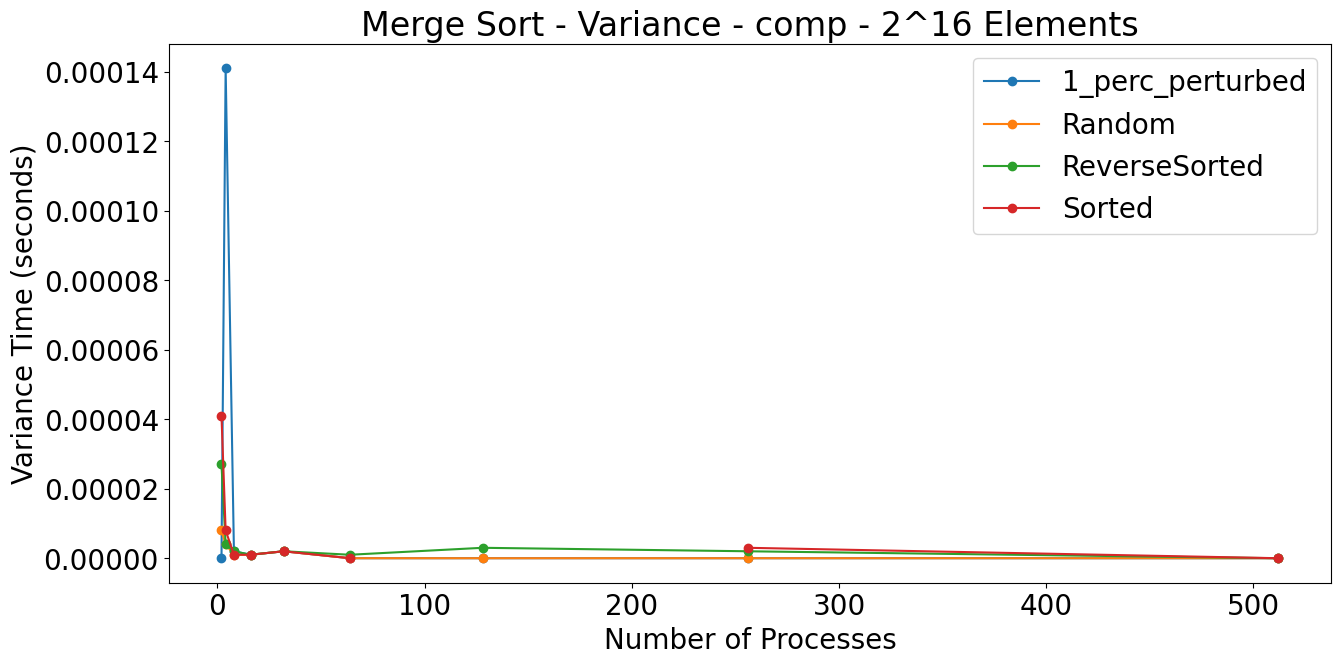

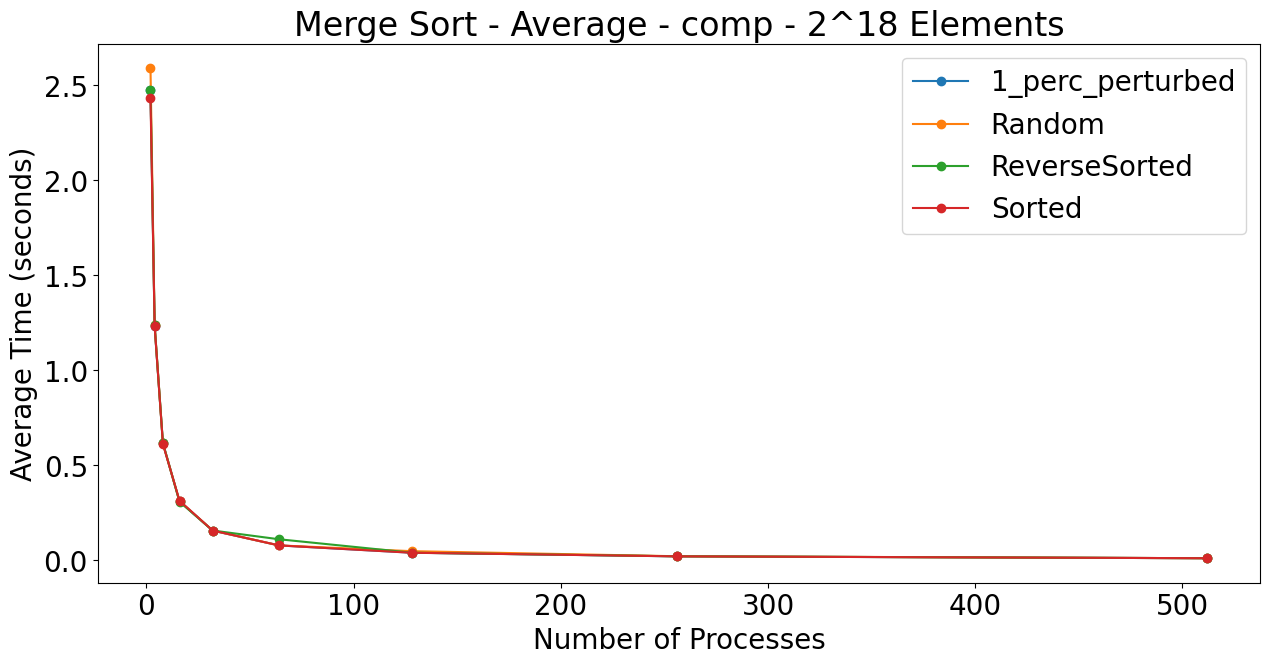

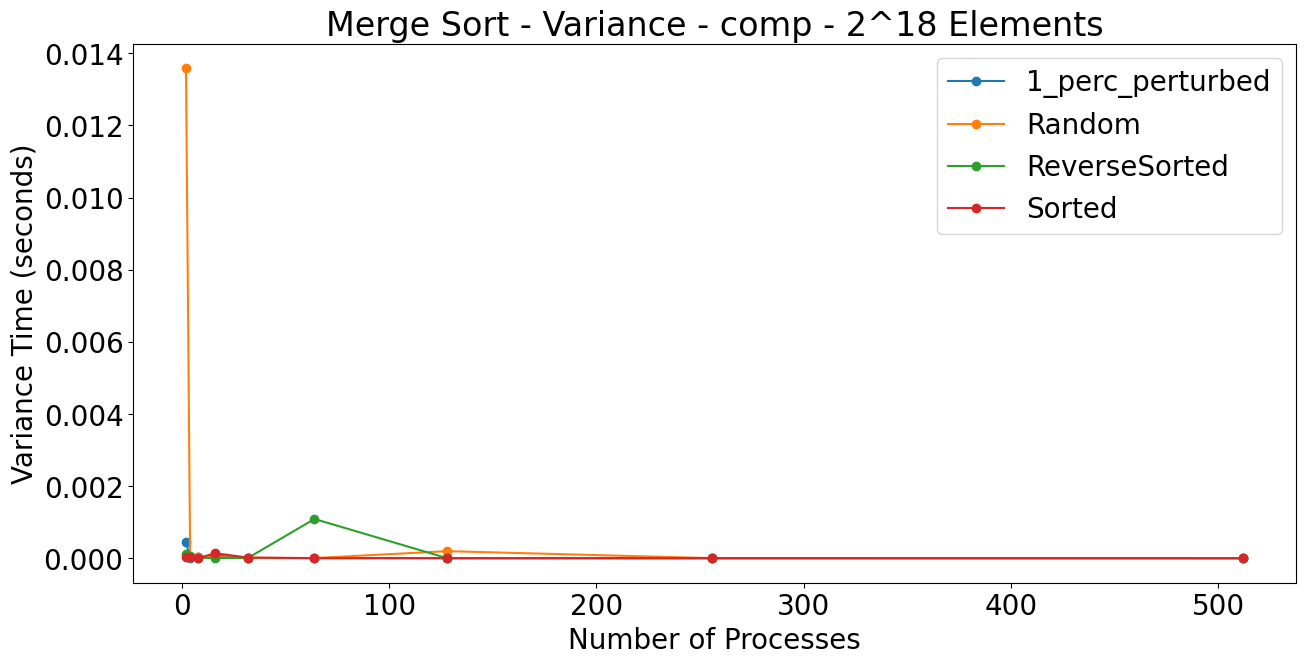

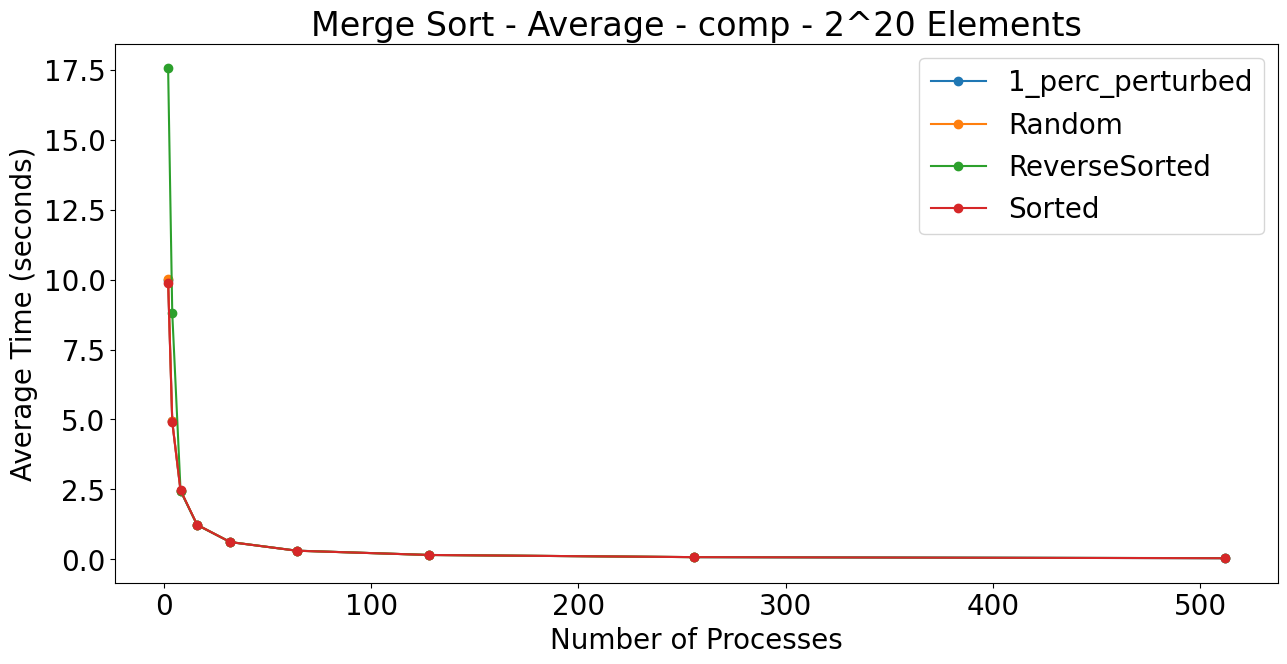

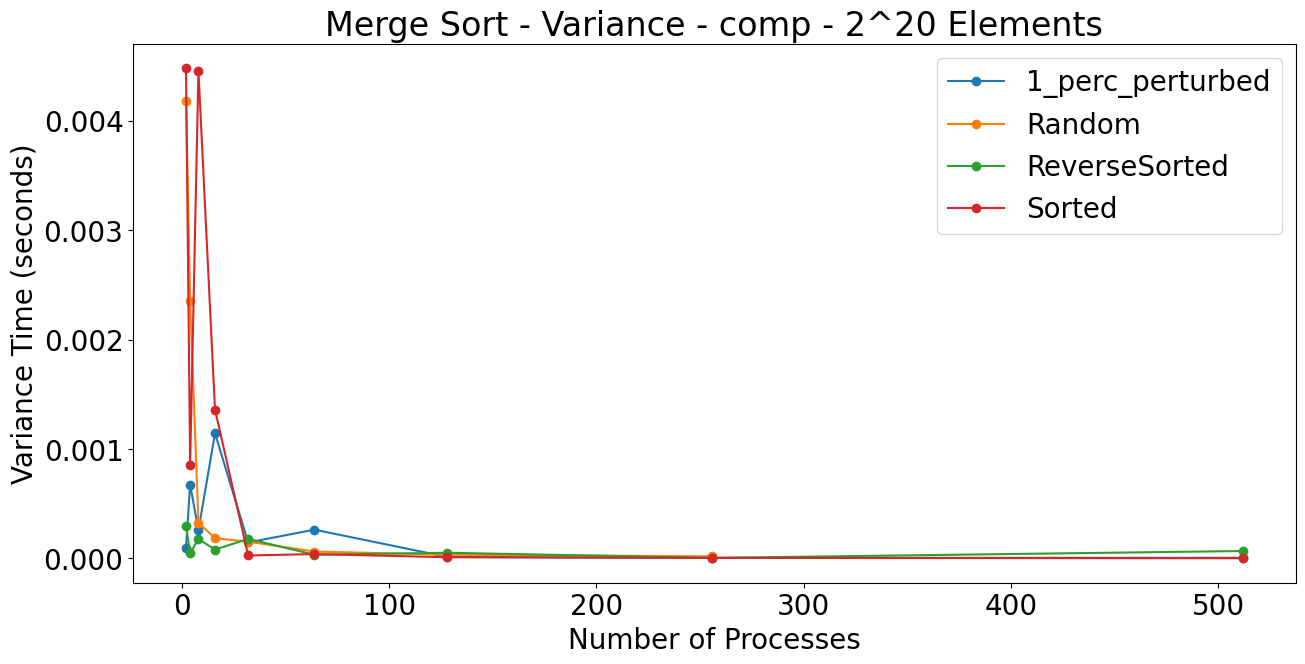

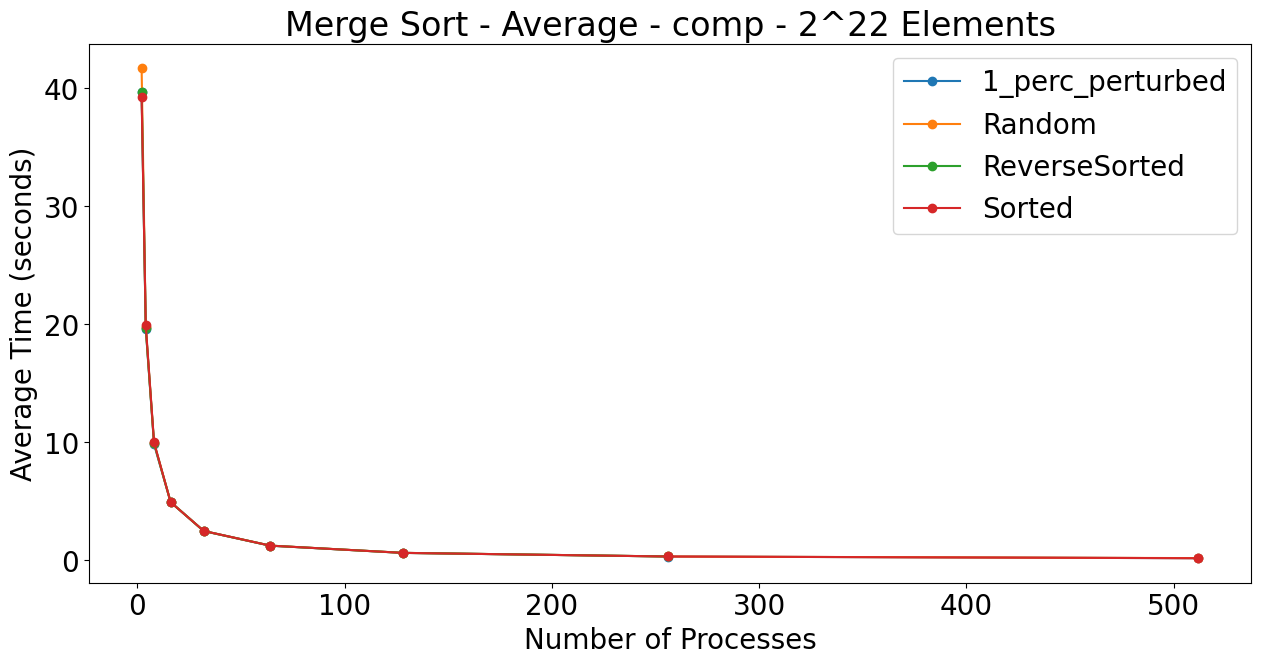

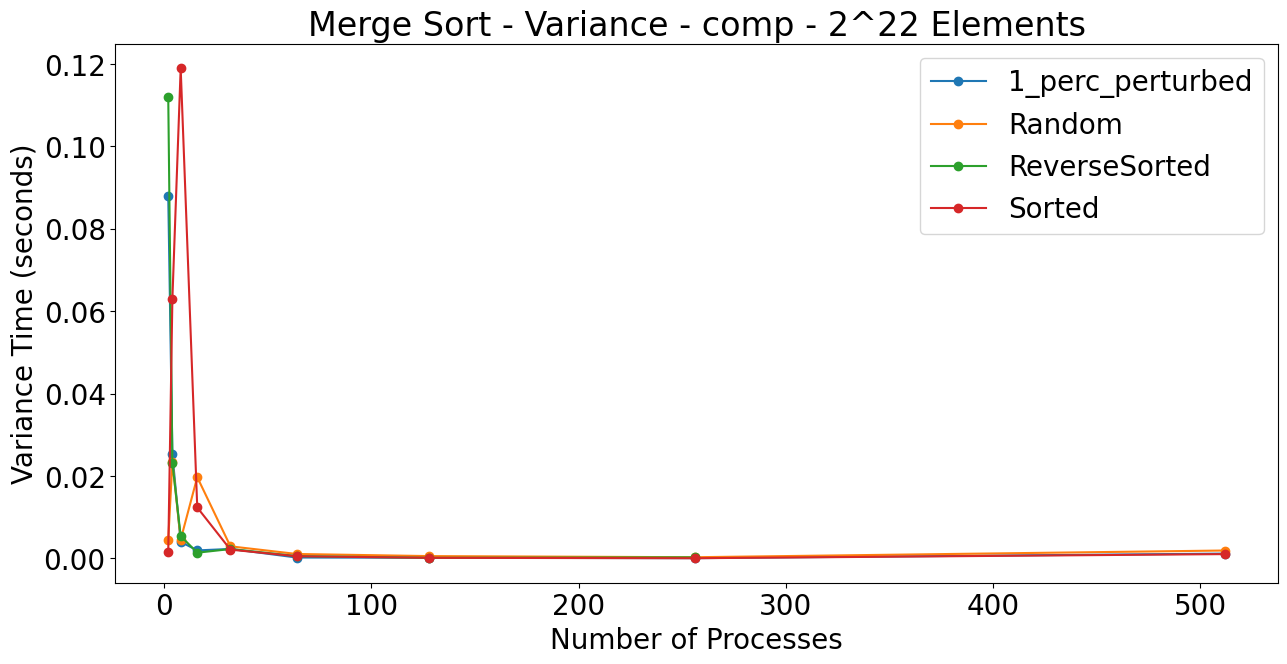

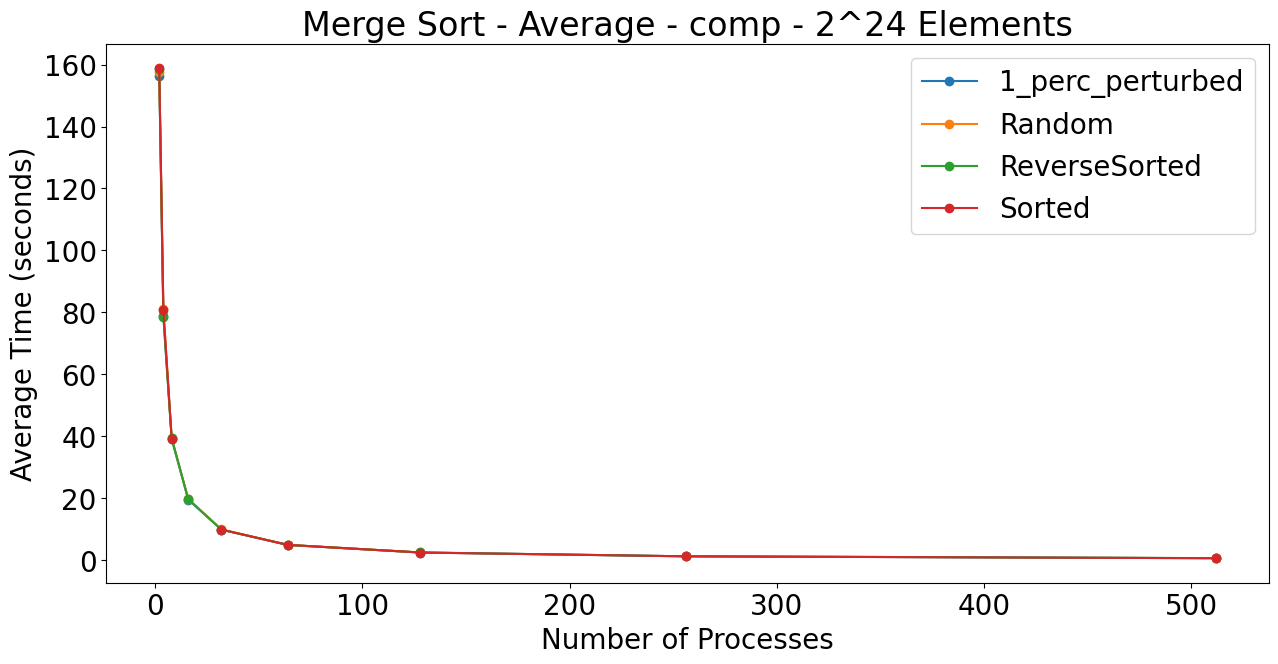

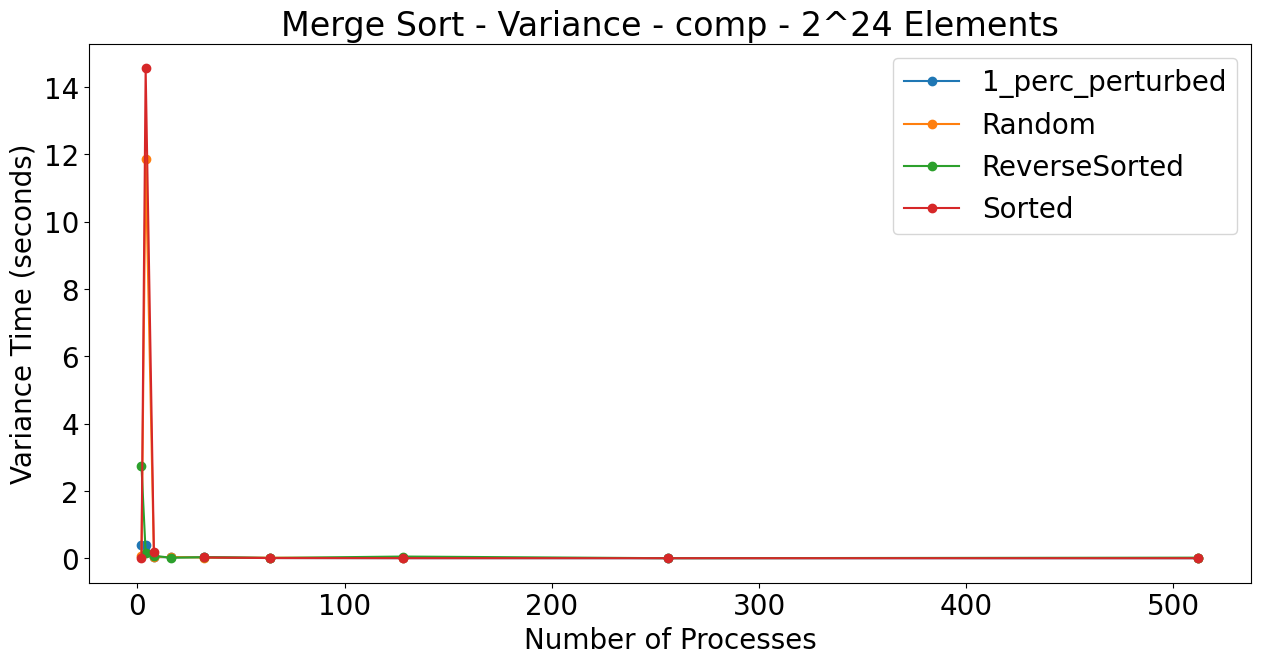

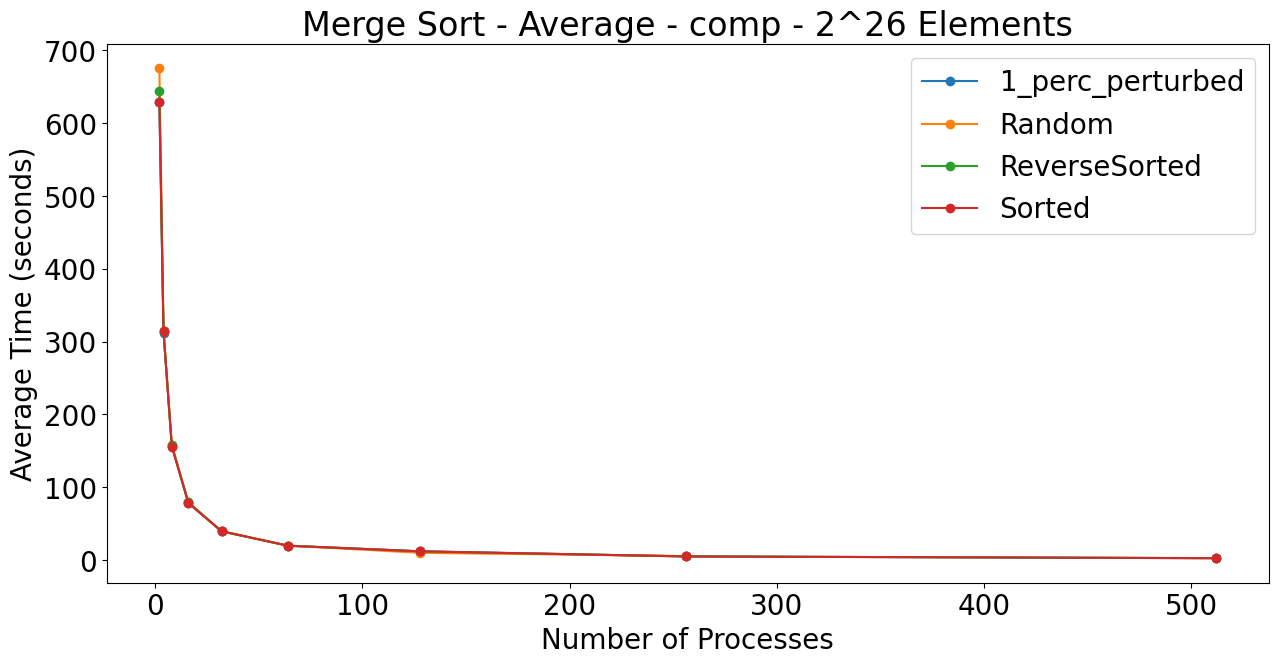

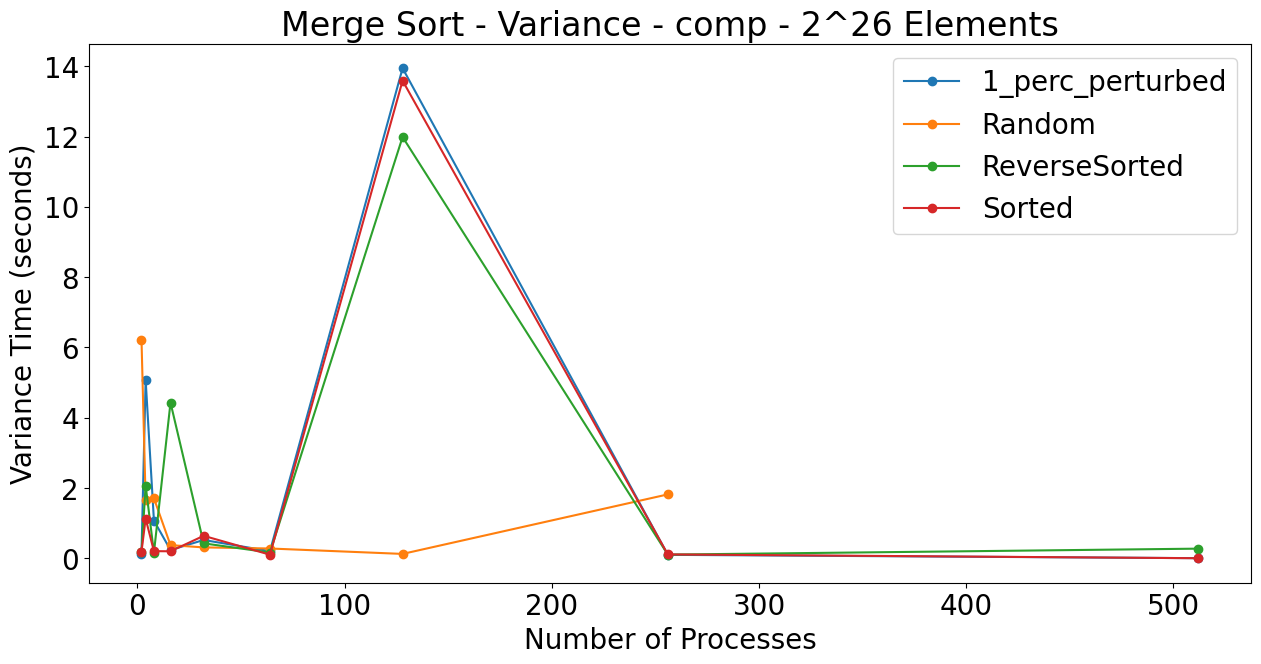

In [19]:
from math import log2

def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

important_names = ["comm", "comp" , "main"]

# Strong Scaling
for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"]].unstack(level="input_size").unstack(level="input_type")
    for input_size in input_sizes:
        region_name = node.frame["name"]
        mat_df = node_df[[("Avg time/rank", input_size, input_types[0]), ("Avg time/rank", input_size, input_types[1]),
                          ("Avg time/rank", input_size, input_types[2]), ("Avg time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        input_size_exp = int(log2(input_size))

        avg_plot = plot_pandas(
            df=mat_df,
            title=f"Merge Sort - Average - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Average Time (seconds)",
        )

        mat_df = node_df[[("Variance time/rank", input_size, input_types[0]), ("Variance time/rank", input_size, input_types[1]),
                          ("Variance time/rank", input_size, input_types[2]), ("Variance time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        var_plot = plot_pandas(
            df=mat_df,
            title=f"Merge Sort - Variance - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Variance Time (seconds)",
        )

        avg_plot
        var_plot

        avg_fig = avg_plot.get_figure()
        avg_fig.savefig(f"Graphs/Merge/Merge_Average_{region_name}_2^{input_size_exp}")
        var_fig = var_plot.get_figure()
        var_fig.savefig(f"Graphs/Merge/Merge_Variance_{region_name}_2^{input_size_exp}")